# PROYECTO DELITOS 
# Análisis de los delitos ocurridos en CABA entre 2016 y 2021

## ABSTRACT
### Introducción
**Contexto comercial:** A lo largo de los años las situaciones delictivas han ido aumentando en toda la Argentina, en particular en las ciudades mas importantes y pobladas del país, en particular la Ciudad Autonoma de Buenos Aires, la cual se tomará como zona geografica de estudio. Concer el comportamineto de los mismos puede generar una fuerte ventaja para combatirlas por parte de las fuerzas policiales y por otro lado puede utilizarse como una ventaja competitiva para la industria y comercios que brinden bienes y servicios a la sociedad, por ejemplo: en que barrios colocar franquicias de empresas gastronomicas de gran importancia, a que hora recomandar a los clientes que asistan, en que franja horaria atender al publico o en que franja horaria recibir a los proveedores, entre otros. 

**Probelma comercial:** Buscando responder el ¿Qué pasó con el delito en Buenos Aires?
Buscamos comprender el comportamiento de la criminalidad en la región estudiada (CABA). Además, se puede hacer un análisis del tipo geográfico, tomando en cuenta las variables de zonas y barrios más peligrosos.

**Objetivo:** El objetivo es realizar diferentes tipos de análisis  que nos permitan obtener información de forma clara y detallada sobre el comportamien delictivo antes, durante y en la post pandemia, como asi tambien el desarrollo geofrafíco del mismo; para poder tener conocimiento y, de ser posible, anticipar este tipo de situaciones.


**Contexto analítico:** El Gobierno de la Ciudad de Buenos Aires implemento desde enero de 2016 hasta diciembre de 2021 un registro de los delitos que suceden en CABA. Gracias a estos registros mencionados, se pudo generar una base de datos que permite, enterder facilmente como se desarrollan este tipo de situciones.

El Data Set se obtuvo de la pagina del Gobierno de CABA, de tipo excell que contiene detalles sobre cada delito, como fecha, franja horaria, ubicación del accidente, tipo de delito, si hubo armas involucradas, tiempo de respuesta, victimas, etc. 

El Listado de Tablas:
- *Tabla Delito:*  Es una tabla que contiene el número identificador del delito cometido, el id del oficial que interviene en el delito, y en el caso de que se haya realizado un arresto en la misma se encuentra el número identificador del arresto.Además, encontramos en la misma el tiempo de respuesta (cuánto se tardó en llegar al lugar de donde se solicitó presencia policial. Está la fecha de la actuación, la franja horaria de la misma. Datos geográficos como longitud, latitud, barrio y comuna.También hay datos de descripción propios de delito como ser tipo, sub delito, usó armas (refiere a identificar si se usaron armas en el procedimiento). Arresto, para identificar si hubo detenidos, y víctimas en el caso de que una persona haya perdido la vida.Arresto (binario cual identifica con un “SI” en caso de haya habido un arresto, caso contrario se identifica con “NO”). Víctimas (proporciona información de la cantidad de víctimas en un delito).
- *Tabla arresto:* En este caso la información que contiene es el identificador del arresto e indica si hubo intervención de un canino en la misma.
- *Tabla Canino:* Contiene una breve descripción del animal que interviene en un procedimiento en caso de ser necesario. Raza, edad del animal y medallas en caso de que cuente con alguna distinción por su trayectoria en la fuerza.
- *Tabla Detenido:* En el caso de haber alguna persona detenida durante el procedimiento, esta tabla muestra su información personal y si tiene antecedentes penales o no.
- *Tabla Oficial:* Esta tabla cumple la función de proporcionar la información personal de los efectivos que intervienen en cada actuación y su rango dentro de la fuerza. Todos tienen un número de identificación, y se detalla a qué comisaría pertenecen
- *Tabla Comisaría:* Aquí se brinda información de cada seccional, dirección, comuna, nombre, teléfono, observaciones, barrio, código postal. 

## Preguntas a resolver mediante el análisis de datos
La problematica principal a la que se buscará dar respuesta con un algoritmo de clasificació será:
- Conociendo las caracteristicas de un delito, ¿Se puede saber si se produjo un arresto o no?. De manera que al poder predecir si se da el arresto, se estaria evaluando indirectamente la capacidad policial y por lo tanto el grado de seguridad qe se le ofrece a la sociedad.

Ademas, se buscará conocer información relacionada.
Sobre la variable tiempo de respuesta. Nos preguntamos:
- El promedio de tiempo de respuesta
- El máximo tiempo respuesta (La demora maxima)
- El mínimo tiempo de respuesta
- En cuantas se tardo mas de 1 hr. en responder y en cuantas menos
            
Sobre la variable barrios nos preguntamos
- Barrio con mayor delitos
- Barrio con menor delitos
- Promedio de delitos entre todos los barrios
- Que cantidad de barrios se ubican por debajo del promedio      

Sobre la variable modalidad de delito. Nos preguntamos
- Mayor modalidad de robo
- Menor modalidad de robo

Sobre la variable fechas de los delitos. Nos preguntamos:
- En que fecha sucedieron mas delitos
- En que fecha sucediren menos delitos
- Promedio de delitos por día
- Promedio de delitos por año
- Año con más delitos En busqueda de poder propiciar un pronostico, son de interes las siguientes pruebas de hipotesis Para que el proceso sea estacionario es necesario que la media y varianza sean constantes

Sobre la variable id de policia. Nos preguntamos:
- Que policia participo en más delitos
- Que policia participo en menos delitos
- Cantidad promedio de participación en delitos

Sobre la variable franja horaria, nos preguntamos:
- Cual es la franja horaria con mayor delitos cometidos
- Cual es la franja horario con menor delitos cometidos
- Mayormente los delitos se cometen en horarios diurnos o nocturnos

Y por ultimo sera relevante conocer como se fue comportando la actividad delitiva a lo largo del tiempo, lo cual se observara con una serie temporal

## Importación de librerías

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
mpl.style.use('bmh')
import pandas_profiling

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, precision_score, f1_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Importación de datos

In [2]:
df_delitos = pd.read_excel('bd_delitosDefinitiva.xlsx')

In [3]:
df_oficial = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Oficial' )
df_comisaria = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Comisaria' )
df_detenido = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Detenido' )
df_canino = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Canino' )
df_arresto = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Arresto' )

## Data Wrangling

In [4]:
df_delitos.head()

id_delito      fecha franja_horaria                   tipo  \
0  DEL1000086952 2016-01-01             13   Robo (con violencia)   
1  DEL1000086953 2016-01-01             22   Robo (con violencia)   
2  DEL1000086954 2016-01-01              1               Lesiones   
3  DEL1000086955 2016-01-01             19  Hurto (sin violencia)   
4  DEL1000086956 2016-01-01              4   Robo (con violencia)   

          subtipo uso_armas  t_respuesta arresto Id_arresto  Id_oficial  \
0             NaN       NaN           84      no        NaN     1100114   
1             NaN       NaN          135      no        NaN     1100305   
2  Siniestro Vial       NaN          143      no        NaN     1100089   
3             NaN       NaN           29      no        NaN     1100058   
4  Robo Automotor       NaN          163      no        NaN     1100546   

              barrio  comuna    latitud   longitud  victimas  
0  Parque Avellaneda     9.0 -34.648730 -58.468536       NaN  
1            Palermo    14.0 -34.576925 -58.407400       NaN  
2   Parque Patricios     4.0 -34.645197 -58.401099       NaN  
3  Parque Avellaneda     9.0 -34.655760 -58.478681       NaN  
4          Caballito     6.0 -34.624128 -58.436826       NaN

In [76]:
df_delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648656 entries, 0 to 648655
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_delito       648656 non-null  object        
 1   fecha           648656 non-null  datetime64[ns]
 2   franja_horaria  648656 non-null  int64         
 3   tipo            648656 non-null  object        
 4   subtipo         648656 non-null  object        
 5   uso_armas       648656 non-null  object        
 6   t_respuesta     648656 non-null  int64         
 7   arresto         648656 non-null  object        
 8   Id_arresto      648656 non-null  object        
 9   Id_oficial      648656 non-null  object        
 10  barrio          648656 non-null  object        
 11  comuna          648656 non-null  object        
 12  latitud         638578 non-null  object        
 13  longitud        638604 non-null  object        
 14  victimas        648656 non-null  flo

In [5]:
df_oficial.head()

Id_oficial                       Nombre       DNI               RANGO?  \
0     1100001              Almendra Muriel  20452504      Comisario mayor   
1     1100002                  Gian Xavier  30302763            Comisario   
2     1100003  Federico Giovanni Alejandro  24076249  Comisario inspector   
3     1100004              Maitte Agustina  35687002            Inspector   
4     1100005               Lisandro Simon  24006261            Inspector   

  estado_civil       Calle_ofi  nro_calle_ofi        Ciudad_ofi Provincia_ofi  \
0       CASADO     GDOR DAVILA          14376             Boedo          CABA   
1      SOLTERO  HEROES DEL SUR          11696  Presidente Peron           GBA   
2       CASADO      M CAMBEIRA           3308        Villa Real          CABA   
3      SOLTERO       CALLE S N           4404             Tigre           GBA   
4       CASADO       CALLE S N          14979     Villa Urquiza          CABA   

       Id_delito  Id_comisaria  
0  DEL1000087400            53  
1  DEL1000086964            32  
2  DEL1000088427            50  
3  DEL1000087047             8  
4  DEL1000088469            51

In [6]:
df_comisaria.head()

Id_comisaria                        nombre_comisaria calle_comisaria  \
0             1                   Comisaria Vecinal 1-D         Lavalle   
1             2  Comisaria Vecinal 1-B (edificio anexo)            Peru   
2             3                   Comisaria Vecinal 1-A         Tucuman   
3             4                   Comisaria Vecinal 1-B         Tacuari   
4             5                     Comisaria Comunal 3         Lavalle   

   altura_comisaria                       telefonos observaciones  \
0               451                  4322-8033/8221           NaN   
1              1056        4307-0537/4361 -8054 /66           NaN   
2              1560  4371-3333 /4373-6194/4374-0454           NaN   
3               770            4331-9643 /4342-3333           NaN   
4              1958                  4953-2273/3323           NaN   

  barrio_comisaria  comuna_comisaria codigo postal  
0      SAN NICOLAS                 1      C1047AAI  
1        SAN TELMO                 1      C1068AAL  
2      SAN NICOLAS                 1      C1050AAF  
3        MONSERRAT                 1      C1071AAP  
4        BALVANERA                 3      C1051ABD

In [7]:
df_detenido.head()

Id_detenido          nombre_detenido  DNI_detenido  q_antecedentes  \
0    D1000001        Antonella Celeste      40041469               0   
1    D1000002             Saida Jazmin      36159618               2   
2    D1000003             Karime Gisel      39633448               5   
3    D1000004           Santiago Ruben      37814145               5   
4    D1000005  Nahuel Benjamin Esteban      44484550               0   

  estado_civil_detenido nacionalidad_detenido       domicilio_calle_detenido  \
0                CASADO             Paraguaya                  LOS JILGUEROS   
1                CASADO            Venezolana               GRITO DE ASENCIO   
2                CASADO              Uruguaya  PAULA ALBARRACIN DE SARMIENTO   
3                CASADO            Venezolana              RICARDO GUIRALDES   
4                CASADO             Boliviana                        MOSCONI   

   altura_detenido   ciudad_detenido provincia_detenido  
0             2352          Barracas               CABA  
1             8923   Vélez Sársfield               CABA  
2            14754   Velez Sarsfield               CABA  
3             8040            Moreno                GBA  
4            12162  Villa Santa Rita               CABA

In [8]:
df_canino.head()

Id_canino                Raza  Edad  Medallas
0   C110001       Pastor aleman     6        33
1   C110002  Labrador Retriever    10        10
2   C110003        Pastor Belga     6         8
3   C110004       Pastor aleman     7        10
4   C110005        Pastor Belga    10         1

In [9]:
df_arresto.head()

Id_arresto           Tipo_arresto Subtipo_arresto Canino? Id_canino  \
0  ARR0000001     Prision Preventiva     No violento      NO       NaN   
1  ARR0000002               Detenido     No violento      NO       NaN   
2  ARR0000003  Privación de libertad        Violento      NO       NaN   
3  ARR0000004  Privación de libertad        Violento      NO       NaN   
4  ARR0000005            Aprehendido        Violento      NO       NaN   

       Id_delito Id_detenido  
0  DEL1000115314    D1000519  
1  DEL1000115315    D1000551  
2  DEL1000115316    D1000069  
3  DEL1000115318    D1001367  
4  DEL1000115319    D1000998

### Datos Faltantes

In [7]:
print(df_delitos.isnull().sum())

id_delito              0
fecha                  0
franja_horaria         0
tipo                   0
subtipo           554915
uso_armas         632903
t_respuesta            0
arresto                0
Id_arresto        388475
Id_oficial             0
barrio             10047
comuna              1763
latitud            10078
longitud           10052
victimas          644808
dtype: int64


In [8]:
print(df_oficial.isnull().sum())

Id_oficial       0
Nombre           0
DNI              0
RANGO?           0
estado_civil     0
Calle_ofi        0
nro_calle_ofi    0
Ciudad_ofi       0
Provincia_ofi    0
Id_delito        0
Id_comisaria     0
dtype: int64


In [9]:
print(df_comisaria.isnull().sum())

Id_comisaria         0
nombre_comisaria     0
calle_comisaria      0
altura_comisaria     0
telefonos            2
observaciones       44
barrio_comisaria     0
comuna_comisaria     0
codigo postal        3
dtype: int64


In [10]:
print(df_detenido.isnull().sum())

Id_detenido                 0
nombre_detenido             0
DNI_detenido                0
q_antecedentes              0
estado_civil_detenido       0
nacionalidad_detenido       0
domicilio_calle_detenido    0
altura_detenido             0
ciudad_detenido             0
provincia_detenido          0
dtype: int64


In [11]:
print(df_canino.isnull().sum())

Id_canino    0
Raza         0
Edad         0
Medallas     0
dtype: int64


In [12]:
print(df_arresto.isnull().sum())

Id_arresto              0
Tipo_arresto            0
Subtipo_arresto         0
Canino?                 0
Id_canino          140534
Id_delito               0
Id_detenido             0
dtype: int64


### Receunto de valores faltantes

In [16]:
for column in md_delitos.columns.values.tolist():
    print(column)
    print (md_delitos[column].value_counts())
    print("")    

id_delito
False    648656
Name: id_delito, dtype: int64

fecha
False    648656
Name: fecha, dtype: int64

franja_horaria
False    648656
Name: franja_horaria, dtype: int64

tipo
False    648656
Name: tipo, dtype: int64

subtipo
True     554915
False     93741
Name: subtipo, dtype: int64

uso_armas
True     632903
False     15753
Name: uso_armas, dtype: int64

t_respuesta
False    648656
Name: t_respuesta, dtype: int64

arresto
False    648656
Name: arresto, dtype: int64

Id_arresto
True     388475
False    260181
Name: Id_arresto, dtype: int64

Id_oficial
False    648656
Name: Id_oficial, dtype: int64

barrio
False    638609
True      10047
Name: barrio, dtype: int64

comuna
False    646893
True       1763
Name: comuna, dtype: int64

latitud
False    638578
True      10078
Name: latitud, dtype: int64

longitud
False    638604
True      10052
Name: longitud, dtype: int64

victimas
True     644808
False      3848
Name: victimas, dtype: int64



Basado en el resumen anterior para cada columna hay 648656 filas de las cuales, en:
- "subtipo": 554915 valores faltantes
- "uso_armas": 632903 valores faltantes
- "Id_arresto": 388475 valores faltantes
- "barrio" : 10047 valores faltantes
- "comuna": 1763 valores faltantes
- "victimas": 644808 valores faltantes
Los valores de latitud y longitud no son de interes, x ello no se tienen en cuenta

In [17]:
for column in md_oficial.columns.values.tolist():
    print(column)
    print (md_oficial[column].value_counts())
    print("")    

Id_oficial
False    599
Name: Id_oficial, dtype: int64

Nombre
False    599
Name: Nombre, dtype: int64

DNI
False    599
Name: DNI, dtype: int64

RANGO?
False    599
Name: RANGO?, dtype: int64

estado_civil
False    599
Name: estado_civil, dtype: int64

Calle_ofi
False    599
Name: Calle_ofi, dtype: int64

nro_calle_ofi
False    599
Name: nro_calle_ofi, dtype: int64

Ciudad_ofi
False    599
Name: Ciudad_ofi, dtype: int64

Provincia_ofi
False    599
Name: Provincia_ofi, dtype: int64

Id_delito
False    599
Name: Id_delito, dtype: int64

Id_comisaria
False    599
Name: Id_comisaria, dtype: int64



Basado en el resumen anterior para cada columna hay 599 filas, en las cuales no hay valores faltantes

In [18]:
for column in md_comisaria.columns.values.tolist():
    print(column)
    print (md_comisaria[column].value_counts())
    print("") 

Id_comisaria
False    49
Name: Id_comisaria, dtype: int64

nombre_comisaria
False    49
Name: nombre_comisaria, dtype: int64

calle_comisaria
False    49
Name: calle_comisaria, dtype: int64

altura_comisaria
False    49
Name: altura_comisaria, dtype: int64

telefonos
False    47
True      2
Name: telefonos, dtype: int64

observaciones
True     44
False     5
Name: observaciones, dtype: int64

barrio_comisaria
False    49
Name: barrio_comisaria, dtype: int64

comuna_comisaria
False    49
Name: comuna_comisaria, dtype: int64

codigo postal
False    46
True      3
Name: codigo postal, dtype: int64



Basado en el resumen anterior para cada columna hay 49 filas de las cuales, en:
- "telefonos": 2 valores faltantes
- "observaciones": 44 valores faltantes
- "codigo postal": 3 valores faltantes


In [19]:
for column in md_detenido.columns.values.tolist():
    print(column)
    print (md_detenido[column].value_counts())
    print("") 

Id_detenido
False    1679
Name: Id_detenido, dtype: int64

nombre_detenido
False    1679
Name: nombre_detenido, dtype: int64

DNI_detenido
False    1679
Name: DNI_detenido, dtype: int64

q_antecedentes
False    1679
Name: q_antecedentes, dtype: int64

estado_civil_detenido
False    1679
Name: estado_civil_detenido, dtype: int64

nacionalidad_detenido
False    1679
Name: nacionalidad_detenido, dtype: int64

domicilio_calle_detenido
False    1679
Name: domicilio_calle_detenido, dtype: int64

altura_detenido
False    1679
Name: altura_detenido, dtype: int64

ciudad_detenido
False    1679
Name: ciudad_detenido, dtype: int64

provincia_detenido
False    1679
Name: provincia_detenido, dtype: int64



Basado en el resumen anterior para cada columna hay 1679 filas, en las cuales no hay valores faltantes

In [20]:
for column in md_canino.columns.values.tolist():
    print(column)
    print (md_canino[column].value_counts())
    print("") 

Id_canino
False    25
Name: Id_canino, dtype: int64

Raza
False    25
Name: Raza, dtype: int64

Edad
False    25
Name: Edad, dtype: int64

Medallas
False    25
Name: Medallas, dtype: int64



Basado en el resumen anterior para cada columna hay 25 filas, en las cuales no hay valores faltantes

In [21]:
for column in md_arresto.columns.values.tolist():
    print(column)
    print (md_arresto[column].value_counts())
    print("") 

Id_arresto
False    260181
Name: Id_arresto, dtype: int64

Tipo_arresto
False    260181
Name: Tipo_arresto, dtype: int64

Subtipo_arresto
False    260181
Name: Subtipo_arresto, dtype: int64

Canino?
False    260181
Name: Canino?, dtype: int64

Id_canino
True     140534
False    119647
Name: Id_canino, dtype: int64

Id_delito
False    260181
Name: Id_delito, dtype: int64

Id_detenido
False    260181
Name: Id_detenido, dtype: int64



Basado en el resumen anterior para cada columna hay 260181 filas,de las cuales en:
- "Id_canino":140534 valores faltantes

### Tratamiento de valores faltantes

Para llevar adelante este tratamineto se decidio remplazar los valores faltantes y no eliminar filas.

En el DataFrame "Delitos", se realizaran los siguienntes remplazos:
- "subtipo": 554915 valores faltantes, por "Sin detalle"
- "uso_armas": 632903 valores faltantes, por "No arma"
- "Id_arresto": 388475 valores faltantes, por "No arresto"
- "barrio" : 10047 valores faltantes, por "Sin dato"
- "comuna": 1763 valores faltantes, por "Sin dato"
- "victimas": 644808 valores faltantes, por 0

In [4]:
df_delitos["subtipo"].replace(np.nan, "Sin detalle", inplace=True)
df_delitos["uso_armas"].replace(np.nan, "No arma", inplace=True)
df_delitos["Id_arresto"].replace(np.nan, "No arresto", inplace=True)
df_delitos["barrio"].replace(np.nan, "Sin dato", inplace=True)
df_delitos["comuna"].replace(np.nan, "Sin dato", inplace=True)
df_delitos["victimas"].replace(np.nan, 0, inplace=True)

En el DataFrame "Comisaria", se realizaran los siguienntes remplazos:
- "telefonos": 2 valores faltantes, por "911"
- "observaciones": 44 valores faltantes por "Sin obsevación"
- "codigo postal": 3 valores faltantes, por "1426" (Codigo postal general de CABA)

In [5]:
df_comisaria["telefonos"].replace(np.nan, "911", inplace=True)
df_comisaria["observaciones"].replace(np.nan, "Sin observación", inplace=True)
df_comisaria["codigo postal"].replace(np.nan, "1426", inplace=True)

En el DataFrame "Arresto", se realizaran los siguienntes remplazos:
- "Id_canino":140534 valores faltantes, por "No canino"

In [6]:
df_arresto["Id_canino"].replace(np.nan, "No canino", inplace=True)

### Tipo de datos

In [30]:
df_delitos.dtypes

id_delito                 object
fecha             datetime64[ns]
franja_horaria             int64
tipo                      object
subtipo                   object
uso_armas                 object
t_respuesta                int64
arresto                   object
Id_arresto                object
Id_oficial                object
barrio                    object
comuna                    object
latitud                   object
longitud                  object
victimas                 float64
dtype: object

In [7]:
df_delitos['id_delito']=df_delitos.franja_horaria.replace({'S/D':'30', 'SD':'30','sd':'30'})
df_delitos['franja_horaria']=df_delitos.franja_horaria.replace({'S/D':'30', 'SD':'30','sd':'30'})
df_delitos['barrio']=df_delitos.barrio.replace({'Agronomía':'Agronomia'})
df_delitos['barrio']=df_delitos.barrio.replace({'Nueva pompeya':'Nueva Pompeya'})
df_delitos['barrio']=df_delitos.barrio.replace({'Boca':'La Boca'})
df_delitos['barrio']=df_delitos.barrio.replace({'Constitución':'Constitucion'})
df_delitos['barrio']=df_delitos.barrio.replace({'San Cristóbal':'San Cristobal'})
df_delitos['barrio']=df_delitos.barrio.replace({'Villa Pueyrredón ':'Villa Pueyrredon'})
for var in ['franja_horaria']:
  df_delitos[var] = df_delitos[var].astype('int64')
for var in ['Id_oficial','comuna','latitud','longitud']:
    df_delitos[var] = df_delitos[var].astype('object')

In [28]:
df_oficial.dtypes

Id_oficial        int64
Nombre           object
DNI               int64
RANGO?           object
estado_civil     object
Calle_ofi        object
nro_calle_ofi     int64
Ciudad_ofi       object
Provincia_ofi    object
Id_delito        object
Id_comisaria      int64
dtype: object

In [8]:
for var in ['Id_oficial']:
    df_oficial[var] = df_oficial[var].astype('object')

In [30]:
df_comisaria.dtypes

Id_comisaria         int64
nombre_comisaria    object
calle_comisaria     object
altura_comisaria     int64
telefonos           object
observaciones       object
barrio_comisaria    object
comuna_comisaria     int64
codigo postal       object
dtype: object

In [31]:
df_detenido.dtypes

Id_detenido                 object
nombre_detenido             object
DNI_detenido                 int64
q_antecedentes               int64
estado_civil_detenido       object
nacionalidad_detenido       object
domicilio_calle_detenido    object
altura_detenido              int64
ciudad_detenido             object
provincia_detenido          object
dtype: object

In [32]:
df_canino.dtypes

Id_canino    object
Raza         object
Edad          int64
Medallas      int64
dtype: object

In [33]:
df_arresto.dtypes

Id_arresto         object
Tipo_arresto       object
Subtipo_arresto    object
Canino?            object
Id_canino          object
Id_delito          object
Id_detenido        object
dtype: object

### Valores duplicados

In [25]:
print(f"Valores duplicados en df_delitos:")
print(df_delitos.duplicated().sum())

Valores duplicados en df_delitos:
0


In [26]:
print(f"Valores duplicados en df_oficial:")
print(df_oficial.duplicated().sum())

Valores duplicados en df_oficial:
0


In [27]:
print(f"Valores duplicados en df_comisaria:")
print(df_comisaria.duplicated().sum())

Valores duplicados en df_comisaria:
0


In [28]:
print(f"Valores duplicados en df_detenido:")
print(df_detenido.duplicated().sum())

Valores duplicados en df_detenido:
0


In [29]:
print(f"Valores duplicados en df_canino:")
print(df_canino.duplicated().sum())

Valores duplicados en df_canino:
0


In [30]:
print(f"Valores duplicados en df_arresto:")
print(df_comisaria.duplicated().sum())

Valores duplicados en df_arresto:
0


### Cuenta de valores

El recuento de valores se realizará para de dataframe Delitos, ya que es el de mayor interes

In [41]:
df_delitos["franja_horaria"].value_counts()

20    41735
19    40951
18    39915
21    36949
17    35347
12    33954
14    33744
16    33603
15    32731
22    32235
13    32102
0     31288
10    28340
11    28177
9     25806
23    25698
8     25417
7     19835
6     15187
1     13240
5     11844
2     10406
3      9070
4      8988
30     2094
Name: franja_horaria, dtype: int64

In [42]:
df_delitos["tipo"].value_counts()

Robo (con violencia)     352758
Hurto (sin violencia)    242060
Lesiones                  52414
Homicidio                  1424
Name: tipo, dtype: int64

In [43]:
df_delitos["subtipo"].value_counts()

Sin detalle                     554915
Siniestro Vial                   43000
Hurto Automotor                  29042
Robo Automotor                   12610
Con uso de moto                   8357
Doloso                             704
Femicidio                           25
Travesticidio/Transfemicidio         2
Femicidio Intrafamiliar              1
Name: subtipo, dtype: int64

In [44]:
df_delitos["uso_armas"].value_counts()

No arma          632903
Arma de fuego     10980
Arma cortante      4773
Name: uso_armas, dtype: int64

In [45]:
df_delitos["arresto"].value_counts()

no    388475
si    260181
Name: arresto, dtype: int64

In [46]:
df_delitos["barrio"].value_counts()

Palermo              51904
Balvanera            44464
Flores               33398
Recoleta             30185
Caballito            29799
San Nicolas          27739
Almagro              26371
Belgrano             21463
Villa Lugano         21039
Barracas             19540
Constitucion         18025
Villa Crespo         17051
Retiro               16748
Mataderos            15636
Monserrat            15398
Nueva Pompeya        14523
Parque Chacabuco     13784
Villa Urquiza        13678
Liniers              11603
San Cristobal        11463
Villa Devoto         11057
Parque Patricios     10970
Villa Soldati        10705
Boedo                10604
Parque Avellaneda    10458
Saavedra             10441
Sin dato             10047
Nuñez                 9989
La Boca               9060
Chacarita             8543
Floresta              8420
San Telmo             8284
Colegiales            7900
Villa Gral. Mitre     6428
Villa Santa Rita      6114
Villa del Parque      5871
Villa Luro            5847
M

In [47]:
df_delitos["comuna"].value_counts()

1.0         87218
3.0         55927
4.0         54092
14.0        51904
7.0         47182
13.0        39352
15.0        37906
9.0         37697
5.0         36975
8.0         35106
12.0        32836
11.0        31259
10.0        31170
2.0         30185
6.0         29800
0.0          8284
Sin dato     1763
Name: comuna, dtype: int64

In [48]:
df_delitos["victimas"].value_counts()

0.0     644808
1.0       3484
2.0        262
3.0         62
4.0         21
5.0          9
6.0          5
7.0          4
10.0         1
Name: victimas, dtype: int64

### Tratamiento valores atípicos

In [9]:
for var in ['franja_horaria']:
    lim_sup = 23
    lim_inf =0
    df_delitos[var].clip(lim_inf, lim_sup, inplace=True)

## EDA: Exploratory Data Analysis

In [50]:
df_delitos.describe()

franja_horaria    t_respuesta       victimas
count   648656.000000  648656.000000  648656.000000
mean        13.562804     101.017438       0.006769
std          6.434239      45.904501       0.096953
min          0.000000      22.000000       0.000000
25%          9.000000      61.000000       0.000000
50%         14.000000     101.000000       0.000000
75%         19.000000     141.000000       0.000000
max         23.000000     180.000000      10.000000

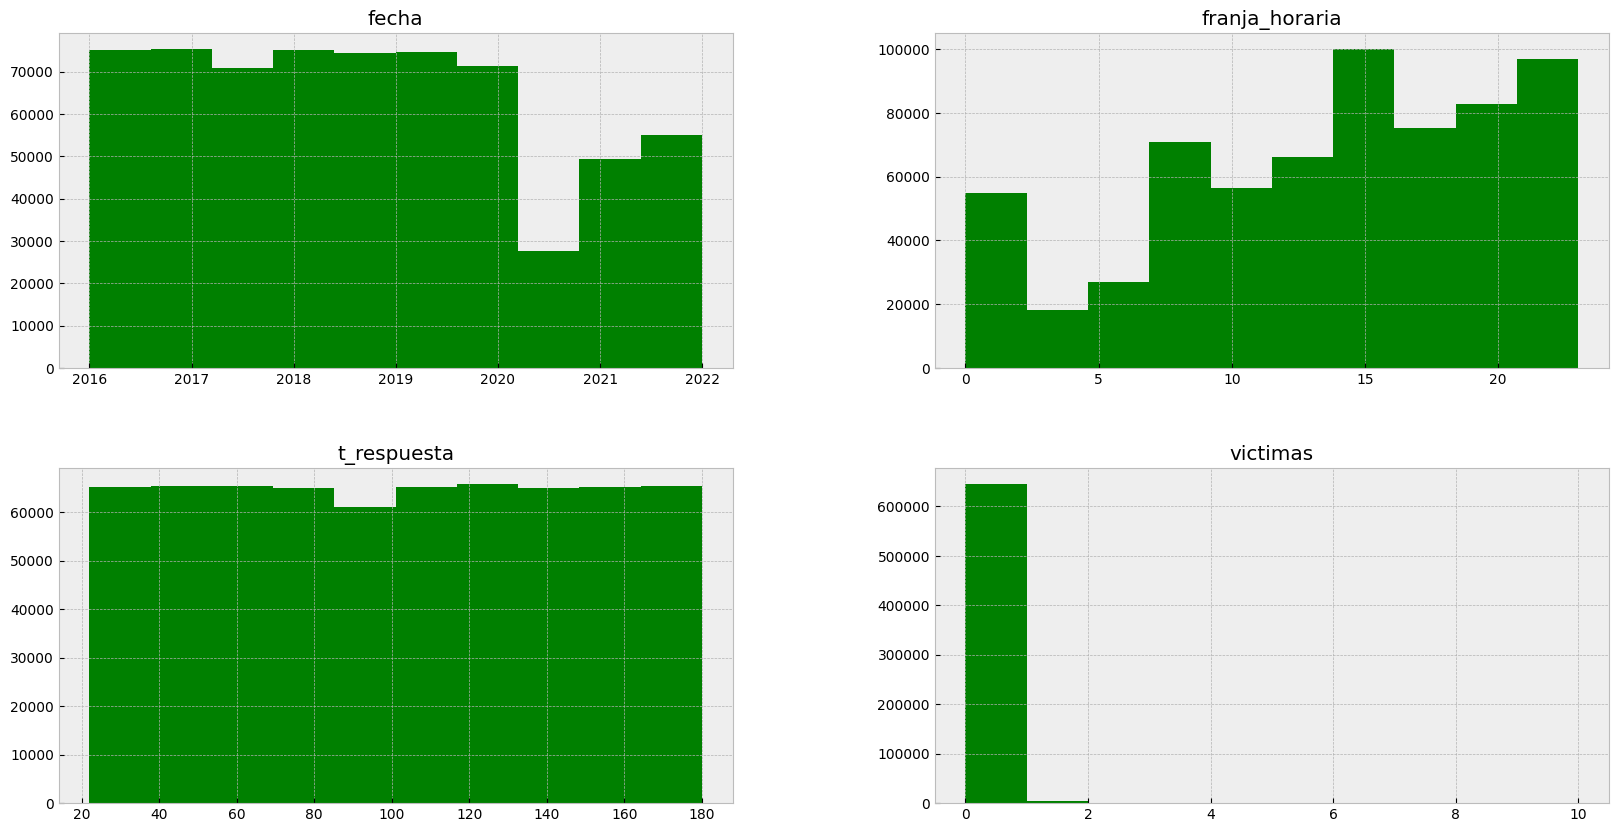

In [51]:
hists = df_delitos.hist(figsize=(20,10), color = 'green')

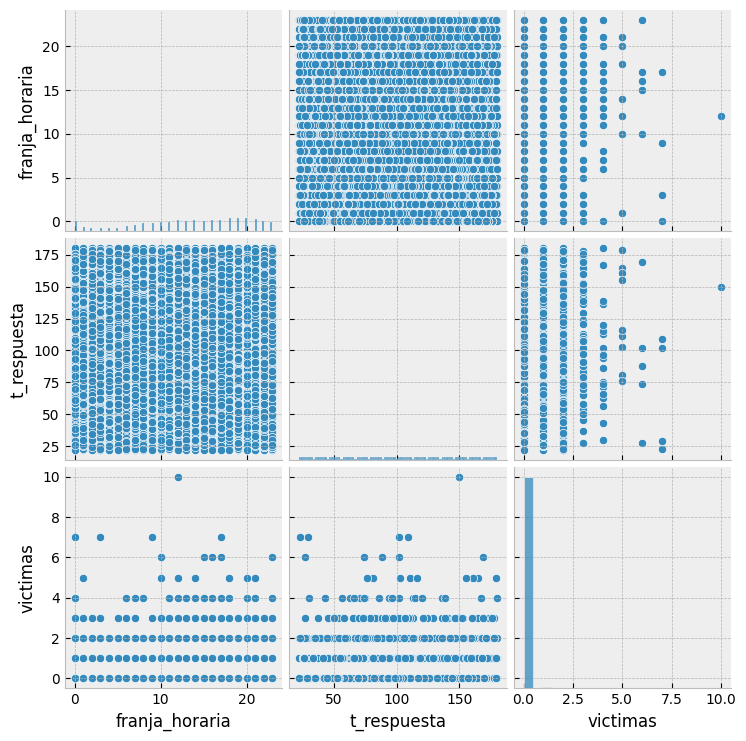

In [52]:
graf=df_delitos[['franja_horaria','tipo','uso_armas','t_respuesta','arresto','barrio','victimas']]
sns.pairplot(graf)

### Análisis Relacional

In [53]:
df_delitos.corr(method = 'spearman')

franja_horaria  t_respuesta  victimas
franja_horaria        1.000000    -0.000066 -0.003621
t_respuesta          -0.000066     1.000000  0.000889
victimas             -0.003621     0.000889  1.000000

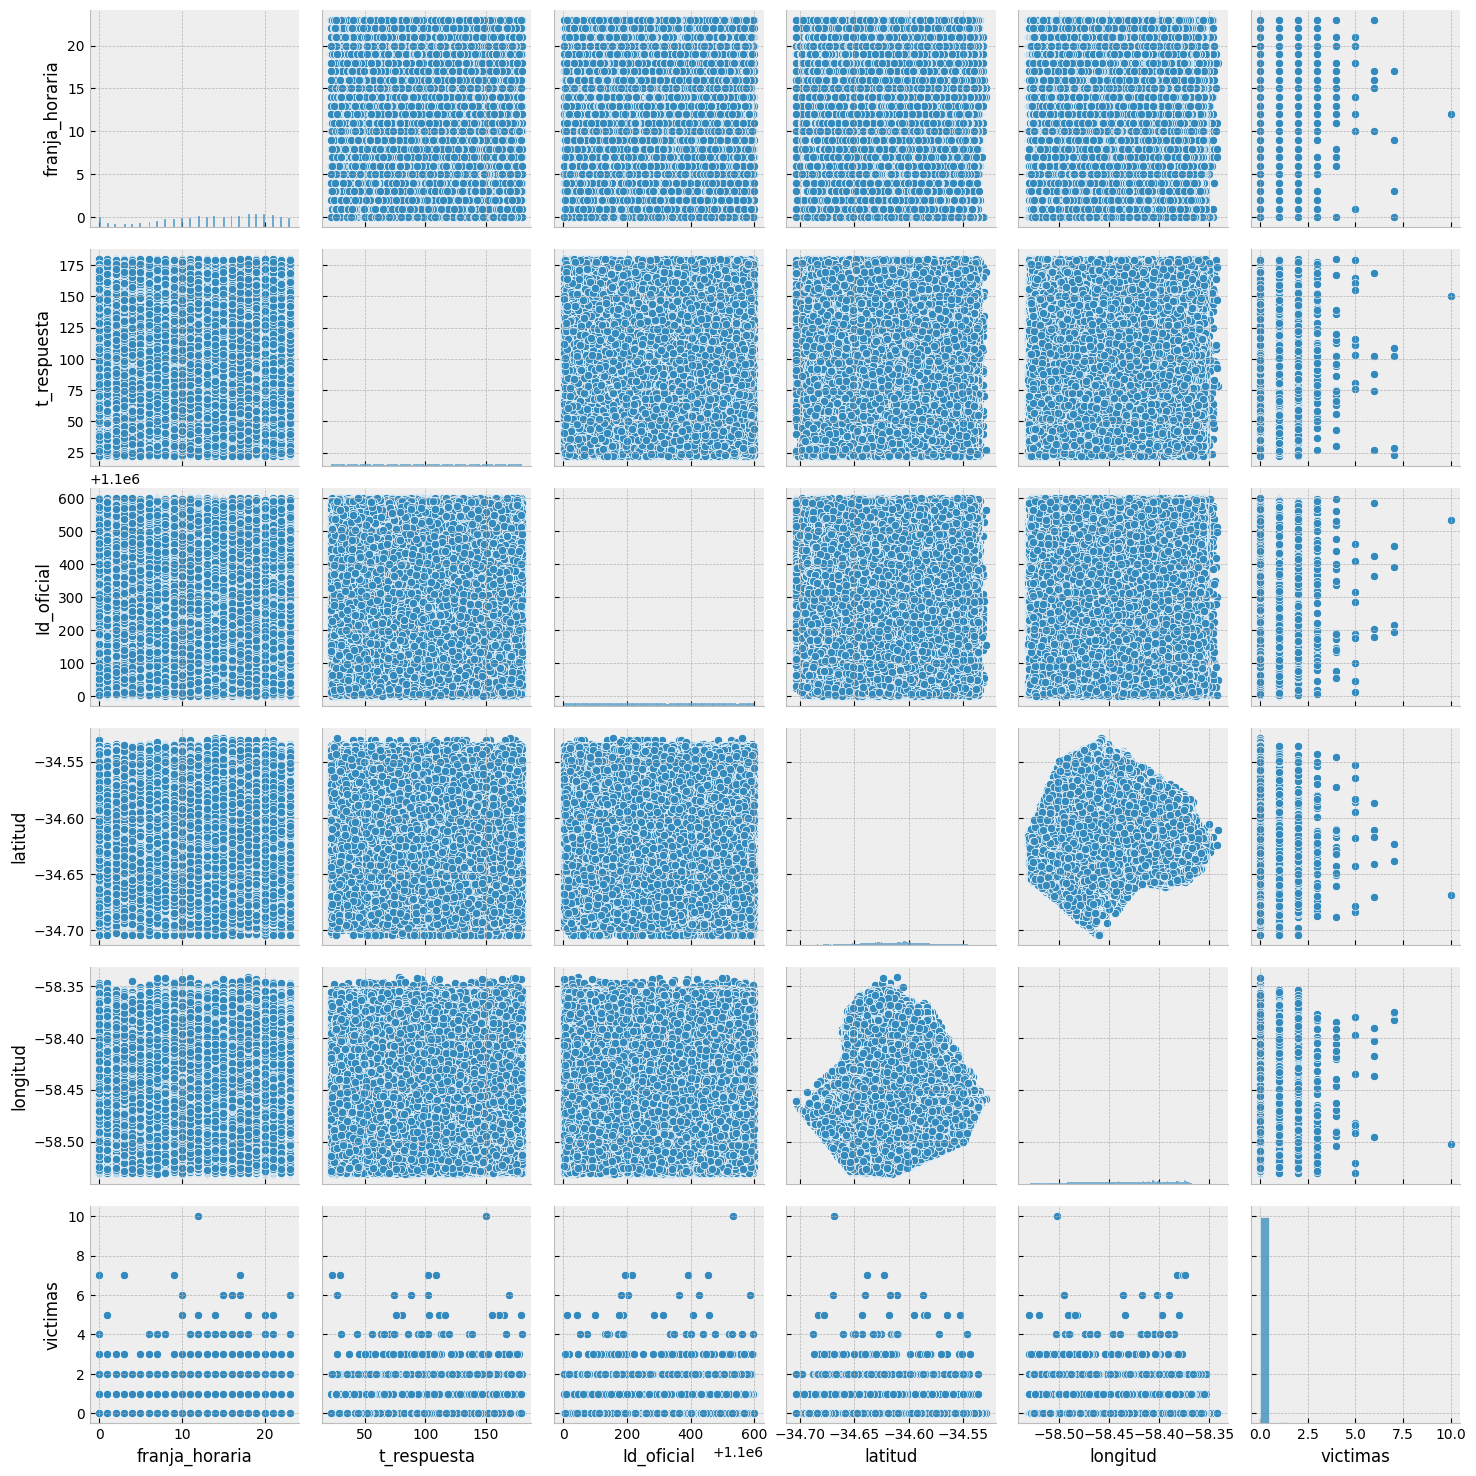

In [54]:
sns.pairplot(df_delitos)

### 1. Evolución de la cantidad de delitos.

Se buscará conocer como a evolucionado la actividad delictiva a lo largo del tiempo, en particular desde enero de 2016 hasta diciembre de 2021.
Se espera que la cantidad de delitos haya disminuido durante el confinamiento obligatório dictado por el gobierno nacional y una vez terminado que los valores de los mismo vuelvan a los que eran antes del dictamen nacional o bien que aumente, debido a la influciencia que este suceso tubo sobre la econimía del país.

Text(0, 0.5, 'Cantidad de delítos')

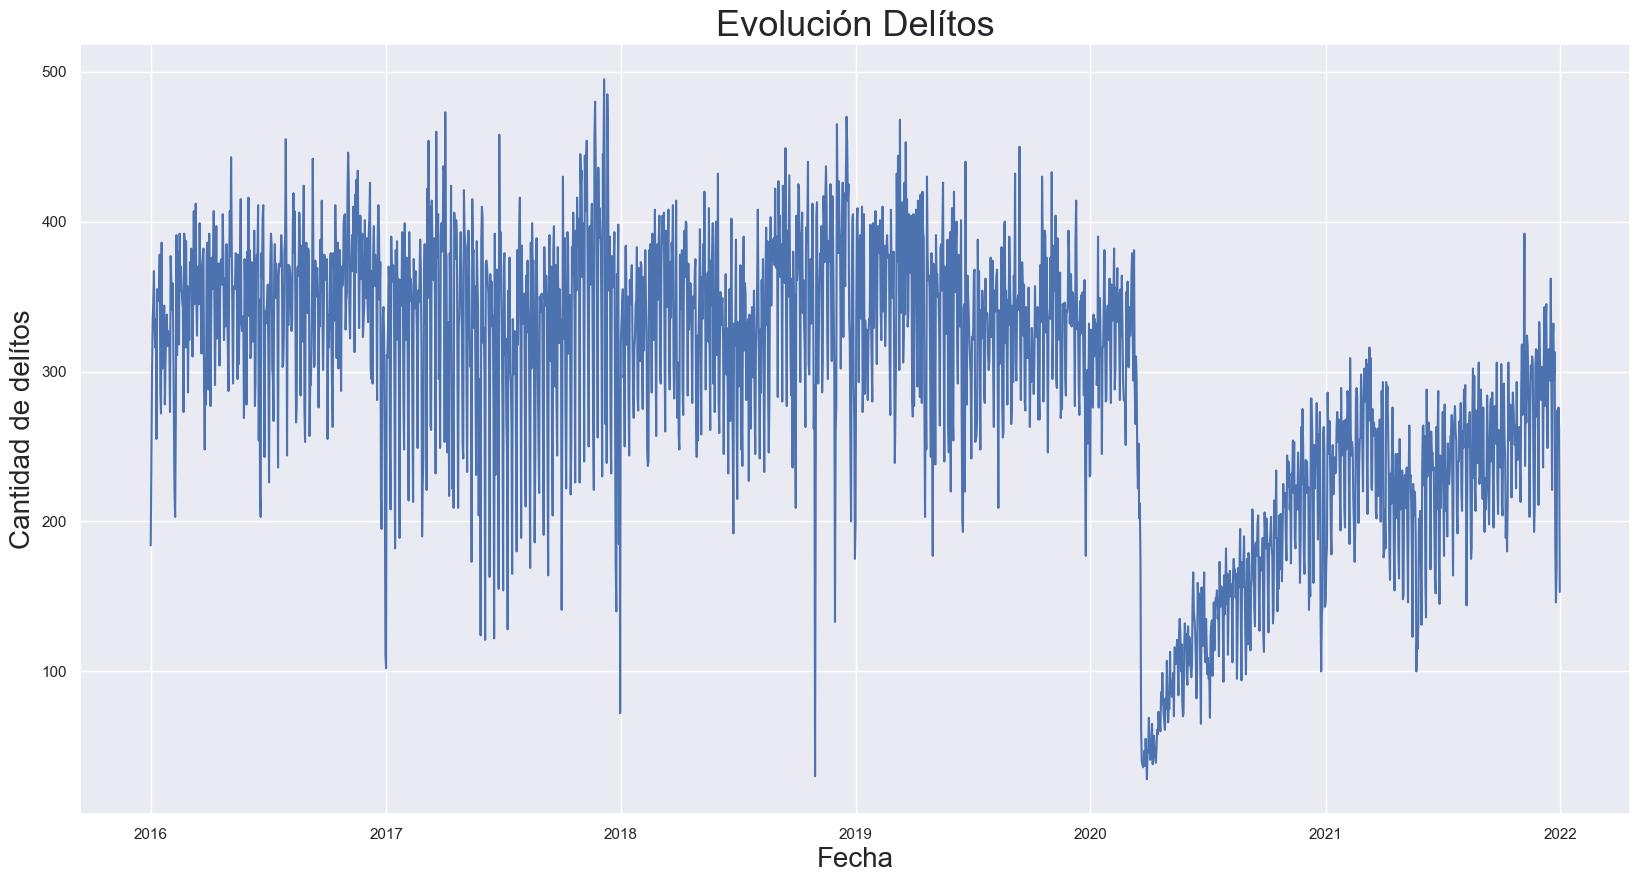

In [56]:
sns.set(rc = {'figure.figsize':(20,10)})
fechas_de_delitos = df_delitos.fecha.groupby(df_delitos.fecha.values).count()

p=sns.lineplot(data=fechas_de_delitos, x=fechas_de_delitos.index, y=fechas_de_delitos.values)
plt.title("Evolución Delítos", fontsize = 26 )
plt.xlabel("Fecha",fontsize = 20)
plt.ylabel("Cantidad de delítos",fontsize = 20)

Se puede notar que desde enero de 2016 hasta diciembre de 2020 la cantidad de delitos diarios es bastante regular, a los principios de cada año los mismo disminuyen para comenzar a aumentar en los meses posteriores hasta Junio/Julio para disminuir levemente durante un periodo de pocos meses y nuevamente volver a aumentar.

Como se esperaba, durante el comienzo del confinamiento, Marzo/Abril de 2020, la cantidad de delítos se ve disminuida notablemente y a medida de que avanza el tiempo la misma va aumentado a la cantidad natural de los años anteriores, aunque sin poder alcanzar, del todo, los valores comunes.
Y dado que se espera que aumente la tasa de delitos, es de suma importancia conocer los lugares y los horarios en que mas se producen los mismos.

### 2.Barrios y horarios.

#### 2.1.Barrios

Con ánimos de concer cuales son los barrios mas seguros, se buscará comparar entre ellos la cantidad de delítos que sucede en cada uno de los mismos.

<BarContainer object of 52 artists>

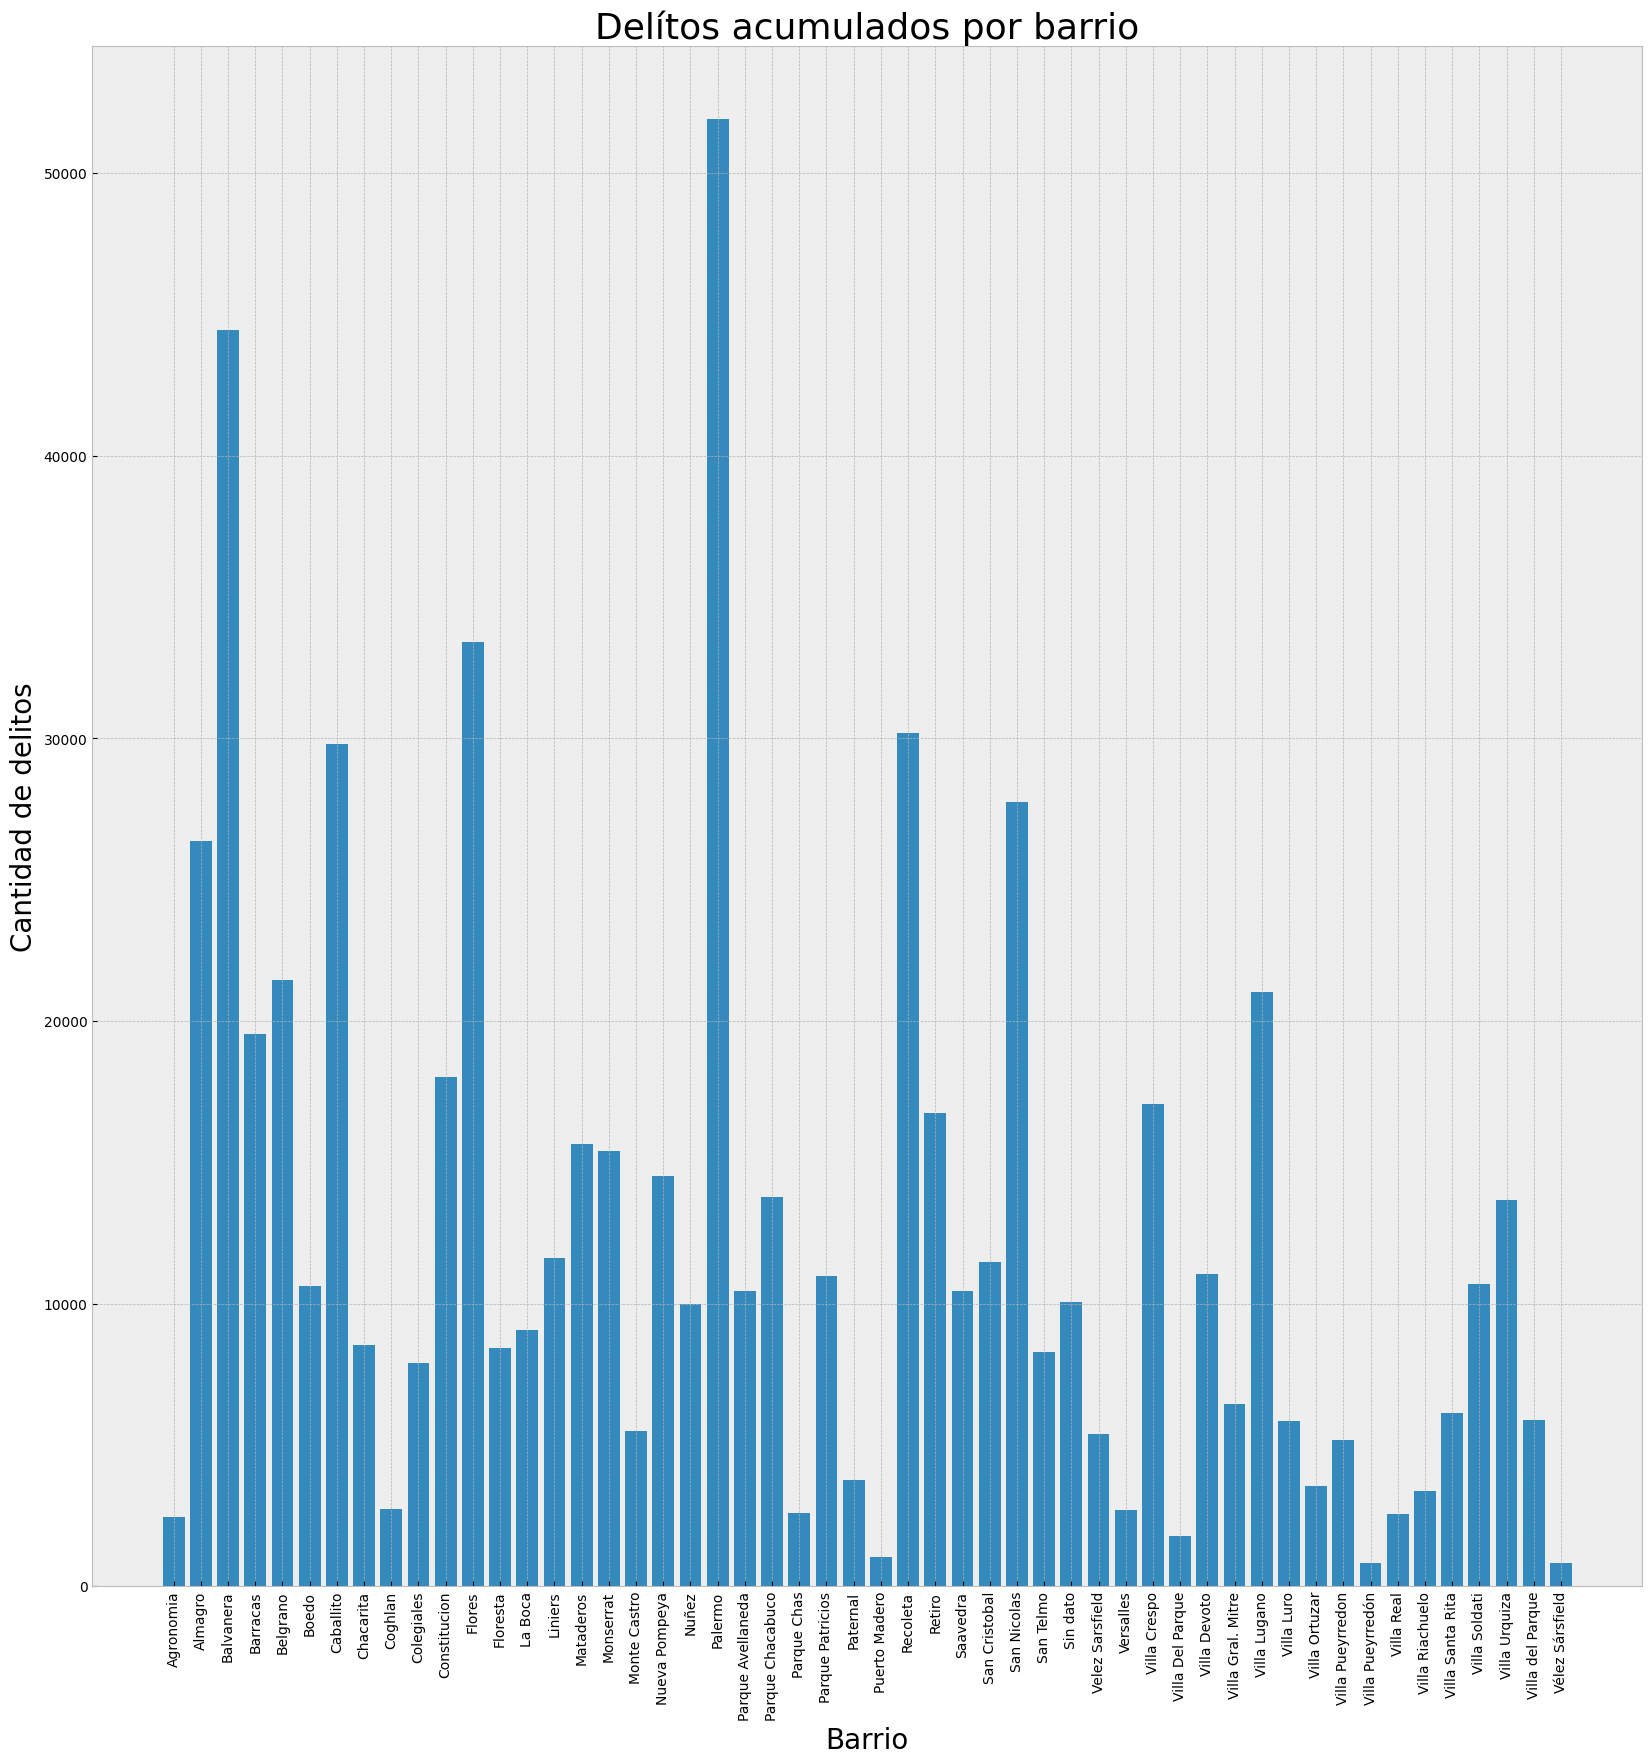

In [12]:
cuenta_barrio = df_delitos.barrio.groupby(df_delitos.barrio).count()
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(rotation = 90)
ax.set_title('Delítos acumulados por barrio',fontsize = 26)
ax.set_ylabel('Cantidad de delitos',fontsize = 20)
ax.set_xlabel('Barrio',fontsize = 20)
ax.bar(cuenta_barrio.index, cuenta_barrio)

Del gráfico se puede observar que el barrio con mayor cantidad de delítos es Palermo, seguido de Balvarena y Flores, todos con mas de 30000 trasgresiones concretados en los años en cuestión, siendo Palermo el lugar con mas robos dado a que es una mas turísticos visitados por extranjeros, Balvarena se puede considerar un barrio donde hay muchos inmigrates. Por el otro lado los barrios con menor tasa de delítos son Puerto Madero, Villa Pueyrredon y Velez Sarfied, los cuales son barrios resindeciales.

#### 2.2 Franja Horaria

En busqueda de conocer cuales son los horarios en donde mas delítos se prodecen se contará la cantidad de los mismos en cada hora del día.

Text(0.5, 0, 'Franja Horaria')

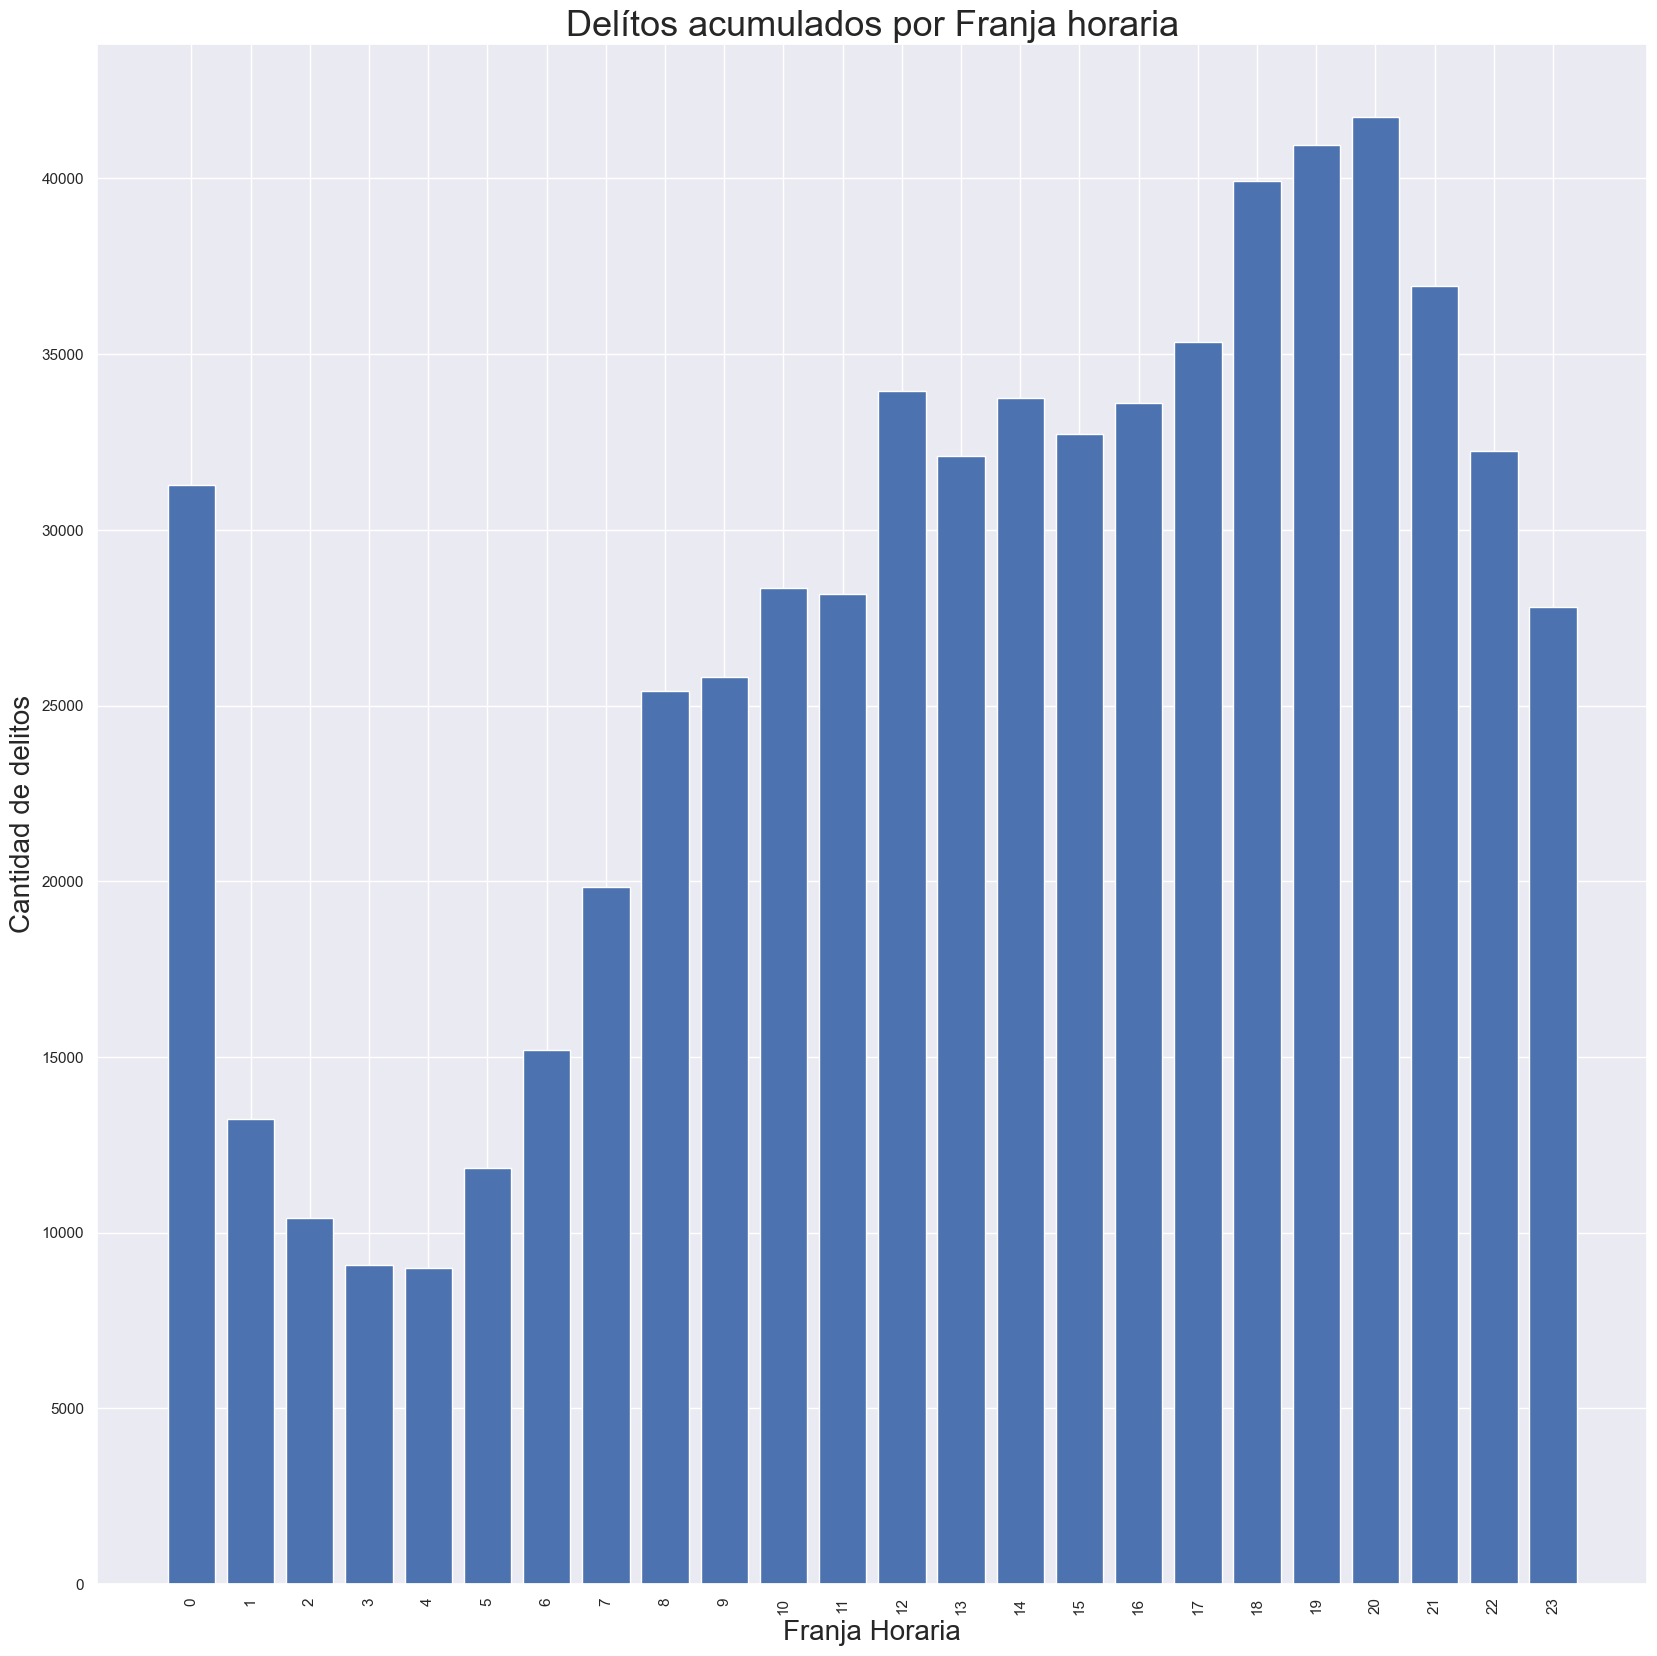

In [58]:
df_delitos['franja_horaria_num']=pd.to_numeric(df_delitos.franja_horaria, errors='coerce')
cuenta_franja = df_delitos.franja_horaria_num.groupby(df_delitos.franja_horaria_num).count().sort_index()
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(cuenta_franja.index.astype(int),rotation = 90)
ax.bar(cuenta_franja.index.astype(int), cuenta_franja)
ax.set_title('Delítos acumulados por Franja horaria',fontsize = 26)
ax.set_ylabel('Cantidad de delitos',fontsize = 20)
ax.set_xlabel('Franja Horaria',fontsize = 20)

Como bien se espera la cantidad de transgresiones acumuladas en horas de la madrugada es baja, dado que el moviento de personas en esos horarios tambien lo es. En la franja horaría de las 7 hasta las 11 am la cantidad de delítos ocurridos no es muy alto contemplando que en esas horas del día el moviento es alto, ya sea por asistencia al trabajo, apertura de locales, entre otros sucesos destacables.

El rango horario mas comprometido es el de las 17 a las 21 horas, lo cual es entendible ya que es el horario en donde los negocios cierran o bien la gente vuelve a sus casas, que en muchos casos es con dinero en mano y por lo tanto se intuye que puede ser un buen factor causanete de los delítos. Lo cual nos lleva a averiguar cuales son los tipos de delitos registrados.

### 3. Tipos de Delítos

En busqueda de concer el comportamiento, es importante concer como es su clasificacíon y tambien en medida se dan.

Text(0.5, 1.0, 'Clasificacón de Delitos')

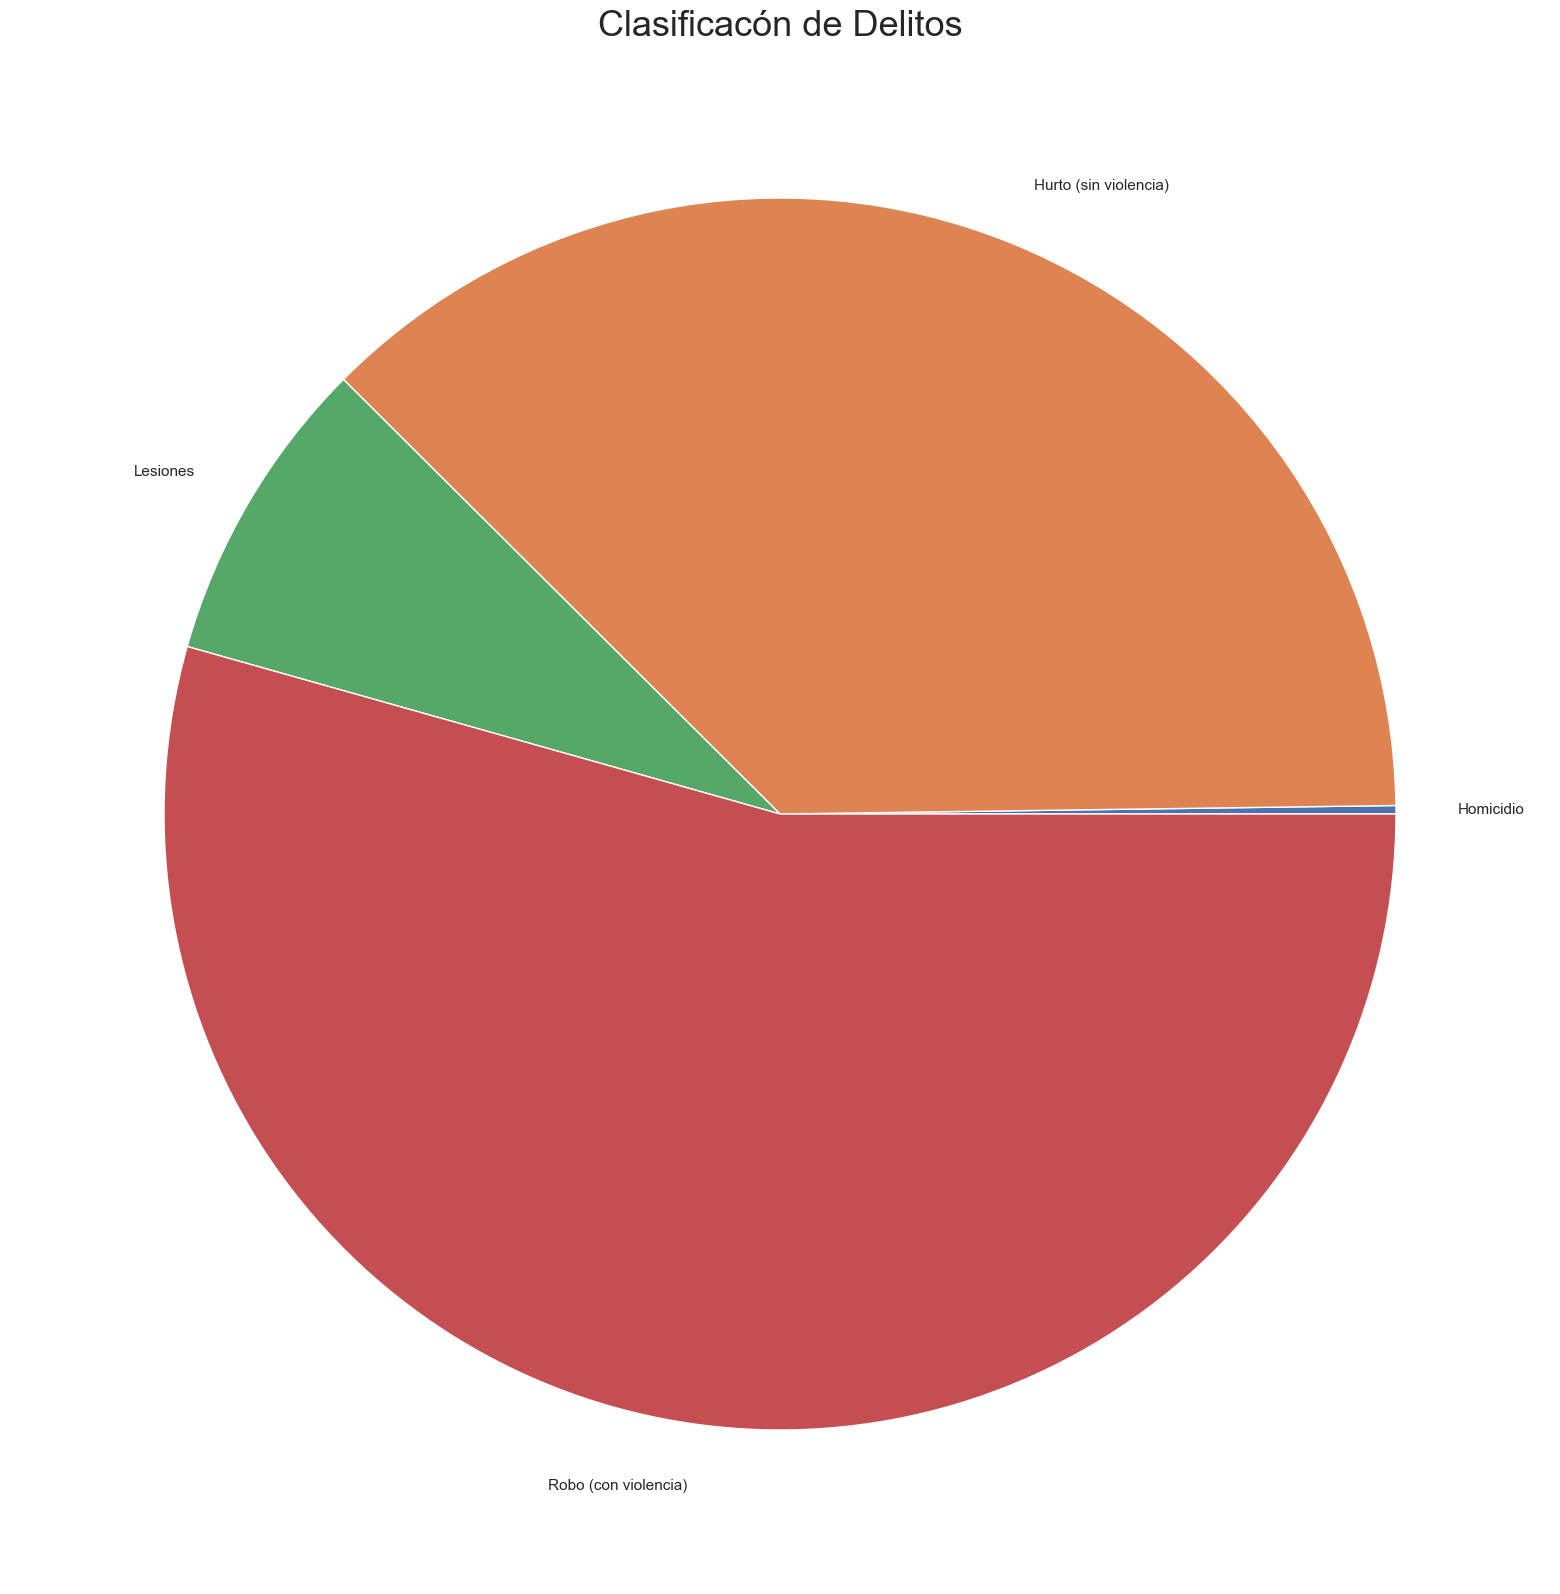

In [59]:
cuentita_b= df_delitos.tipo.groupby(df_delitos.tipo).count()
fig,ax = plt.subplots(figsize =(20, 20))
ax.pie(cuentita_b, labels = cuentita_b.index)
ax.set_title('Clasificacón de Delitos',fontsize = 26)

Los delítos se calsifican en 4 categorías, las cuales son robo o hurto que puede ser sin o con violencia, homicidio o lesiones. Mas del 50% de las trangresiones son robos con violencia, continuados por robos sin violencia y el la menor cantidad de los delitos son homicidios

Los robos como las lesiones pueden ser ocacionadas por ataques fisícos, pero los homicidio muy probablemente sean realizados con armas, por lo que es necesario conocer la proporción de delítos que se realicen sin arma o bien con armas, tanto las denominadas "blancas" como tambien las que no.

Text(0.5, 1.0, 'Uso de Armas')

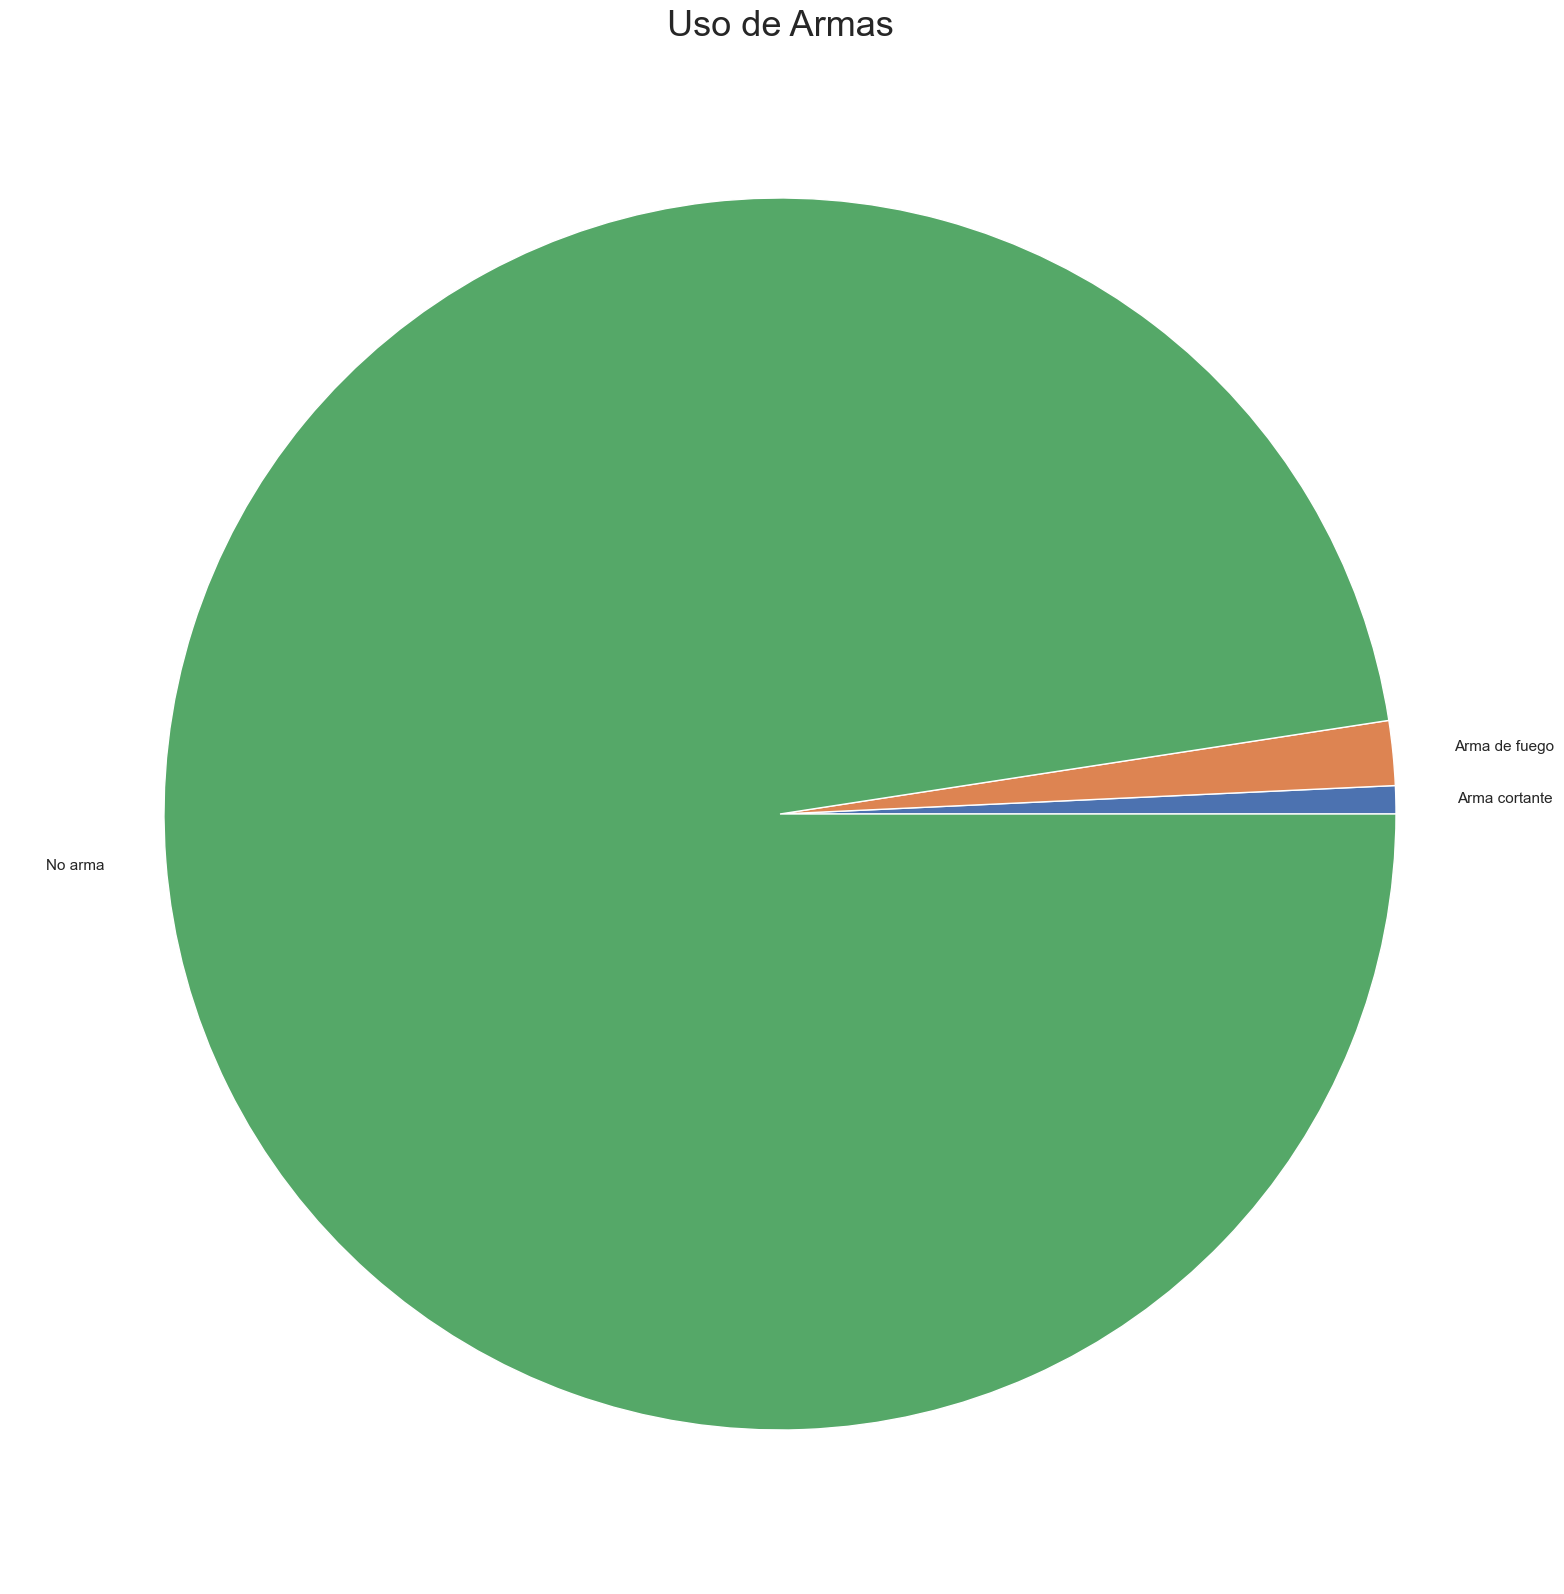

In [60]:
c_armas= df_delitos.uso_armas.groupby(df_delitos.uso_armas).count()
fig,ax = plt.subplots(figsize =(20, 20))
ax.pie(c_armas, labels = c_armas.index)
ax.set_title('Uso de Armas',fontsize = 26)

En la mayoria de los casos no se utiliza ningun tipo de arma,  y en los que sí, se puede notar que el porccentaje de los mismo es bajo, lo cual se puede suponer que es coincidente con el porcentaje de delítos caracterizados como homicidios.

Con respecto a lo ultimo mencionado, conocer el número de victimas acumladas puede dar una buena noción de la gravedada de los homicidios.

Text(0.5, 0, 'Cantidad')

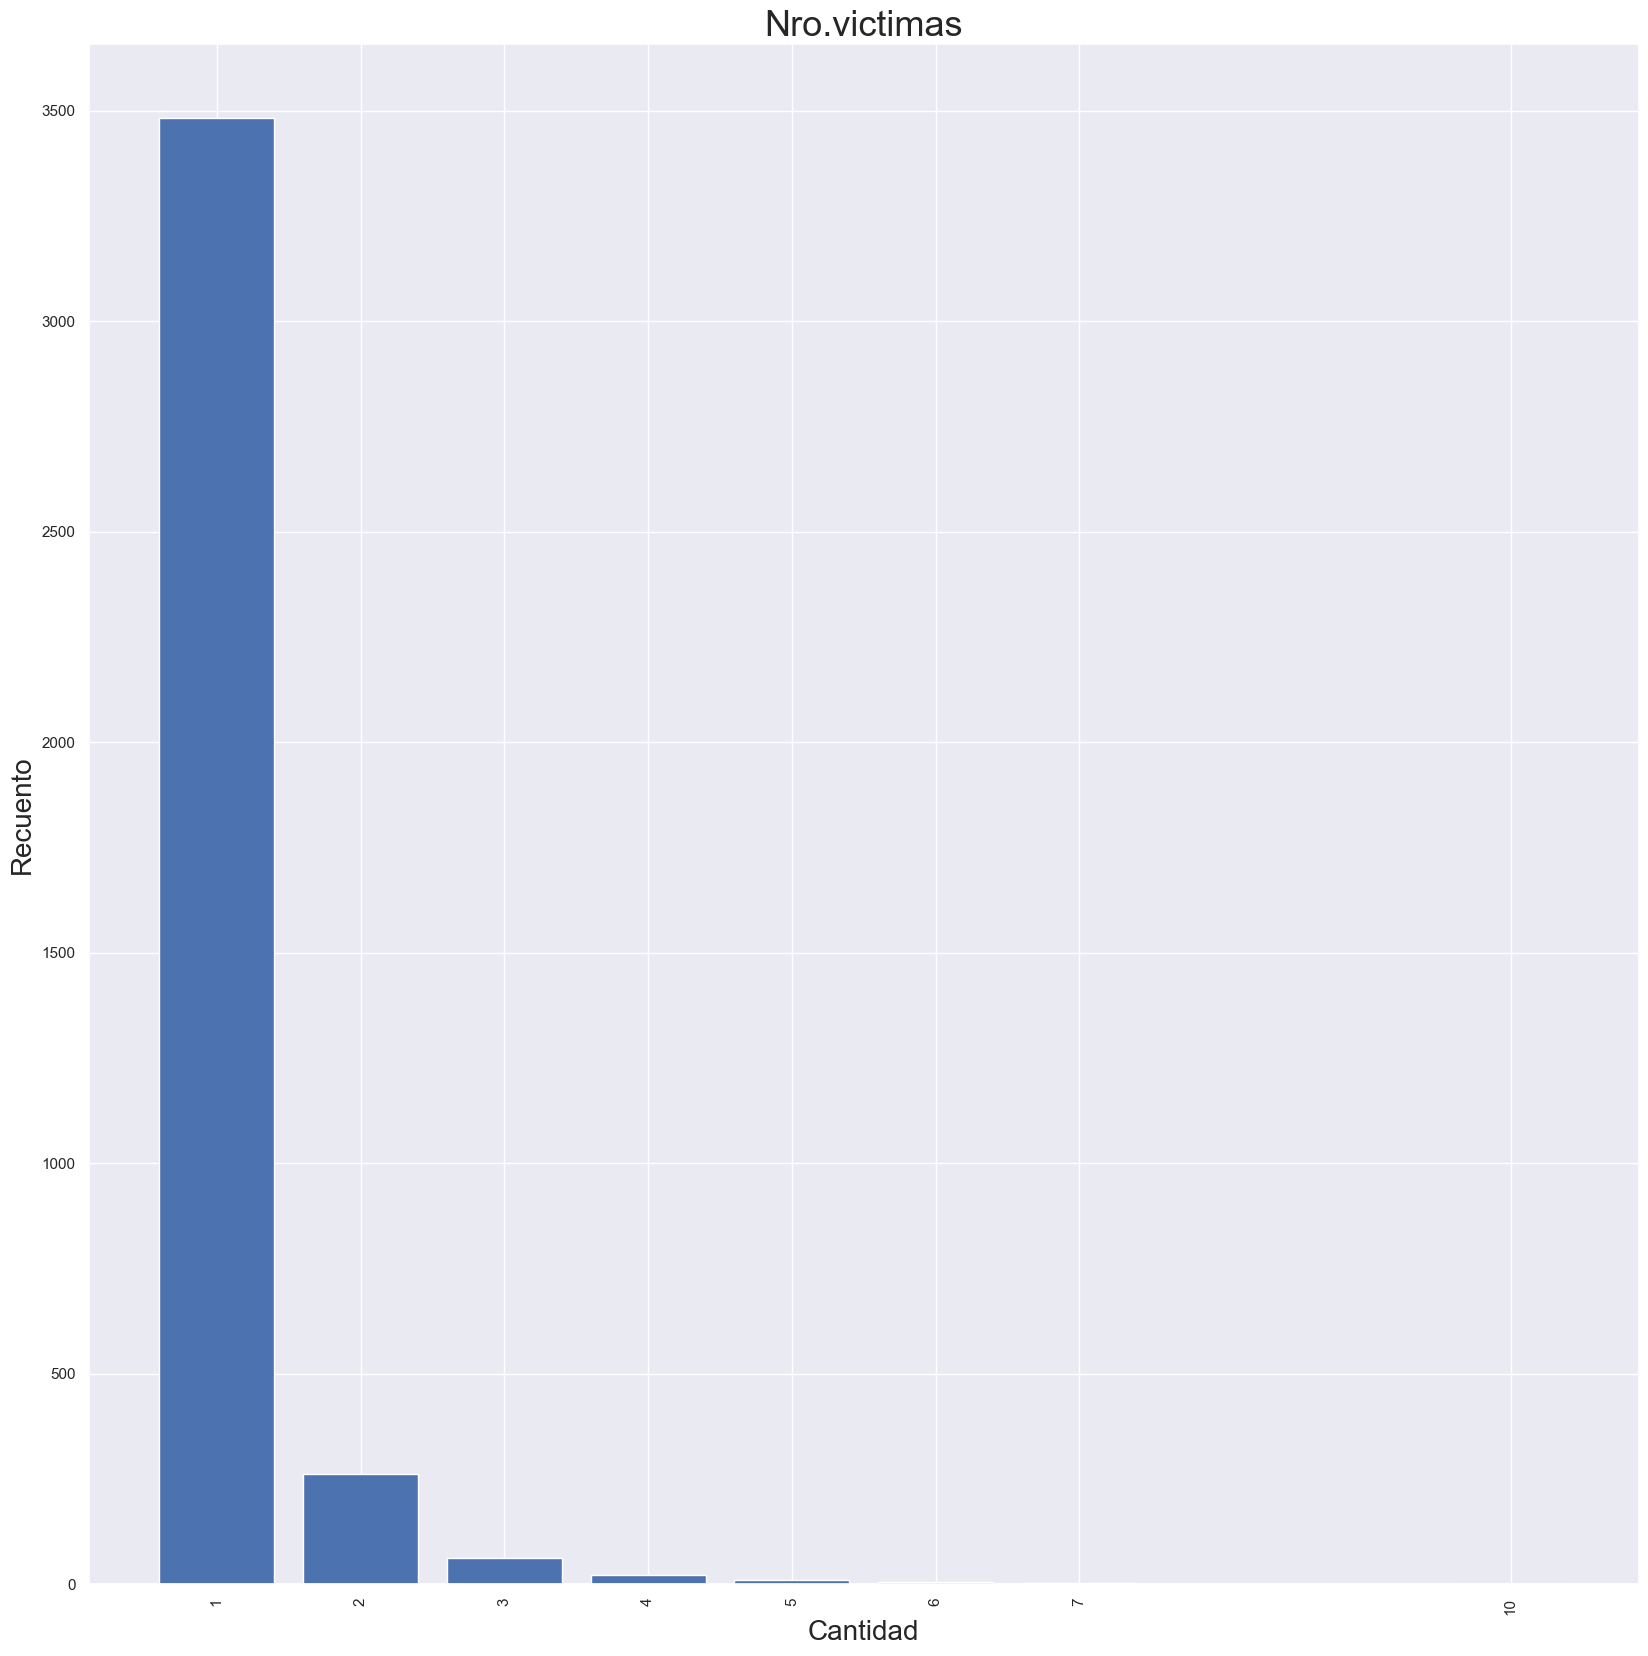

In [61]:
cuenta = df_delitos.victimas.groupby(df_delitos.victimas).count()
data = {"Cantidad_de_victimas":cuenta.index,
        "recuento":cuenta}
cuenta_victimas = pd.DataFrame(data)
cuenta_victimas.drop([0], axis=0, inplace=True)
cuenta_victimas
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(cuenta_victimas.Cantidad_de_victimas,rotation = 90)
ax.bar(cuenta_victimas.Cantidad_de_victimas, cuenta_victimas.recuento)
ax.set_title('Nro.victimas',fontsize = 26)
ax.set_ylabel('Recuento',fontsize = 20)
ax.set_xlabel('Cantidad',fontsize = 20)

Si bien se trata de homicidios, el nro. de los mismos es bajo siendo en la mayoria de los casos que ocurren 1 o 2 personas y ya en menor medida 3,4 o 5.

Ahora que se conocer como se comporta la actividad delictiva, habrá que conocer la contracara de la situación, es decir a quienes deben proteger a los ciudadanos, la policía.

### 4. Actividad policial

Ya conocidos como se puede caracterizar los delítos, es muy importante conocer al actuar de las fuerzas policiales para contrarestarlos
En primer lugar buscaremos conocer como es el tiempo de respuesta de los efectivos.

Text(0, 0.5, 'Frecuencia absoluta')

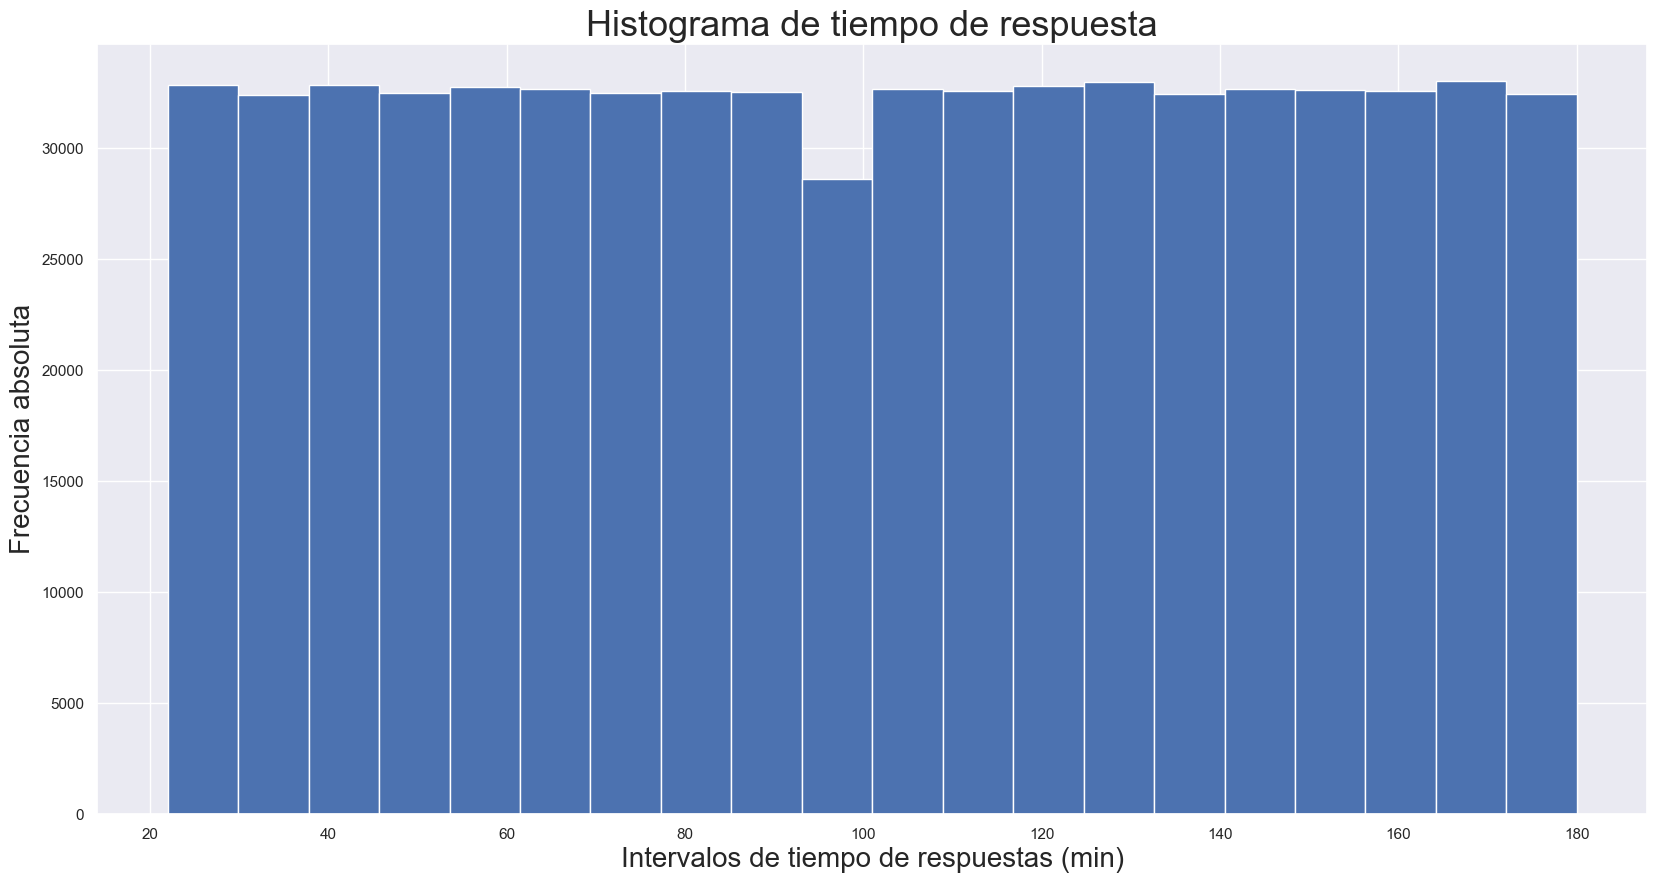

In [62]:
fig, ax = plt.subplots()
ax.hist(df_delitos.t_respuesta, bins=20)
ax.set_title('Histograma de tiempo de respuesta', fontsize = 26)
ax.set_xlabel('Intervalos de tiempo de respuestas (min)',fontsize = 20)
ax.set_ylabel('Frecuencia absoluta',fontsize = 20)

Se puede notar que los tiempos de respuesta pueden llegar a tener una distribución uniforme entre aproximadamente 23 minutos y 180, lo cual es preocupante, ya que es muy elevada la cantidad de hechos en los que el tiempo de respuesta supera la hora, dado que superado ese tiempo es muy dificíl poder arrestar a los malechores. Siendo a continución muy importante concer en cuantos casos se realizan arrestos.

Text(0.5, 1.0, 'Arrestos')

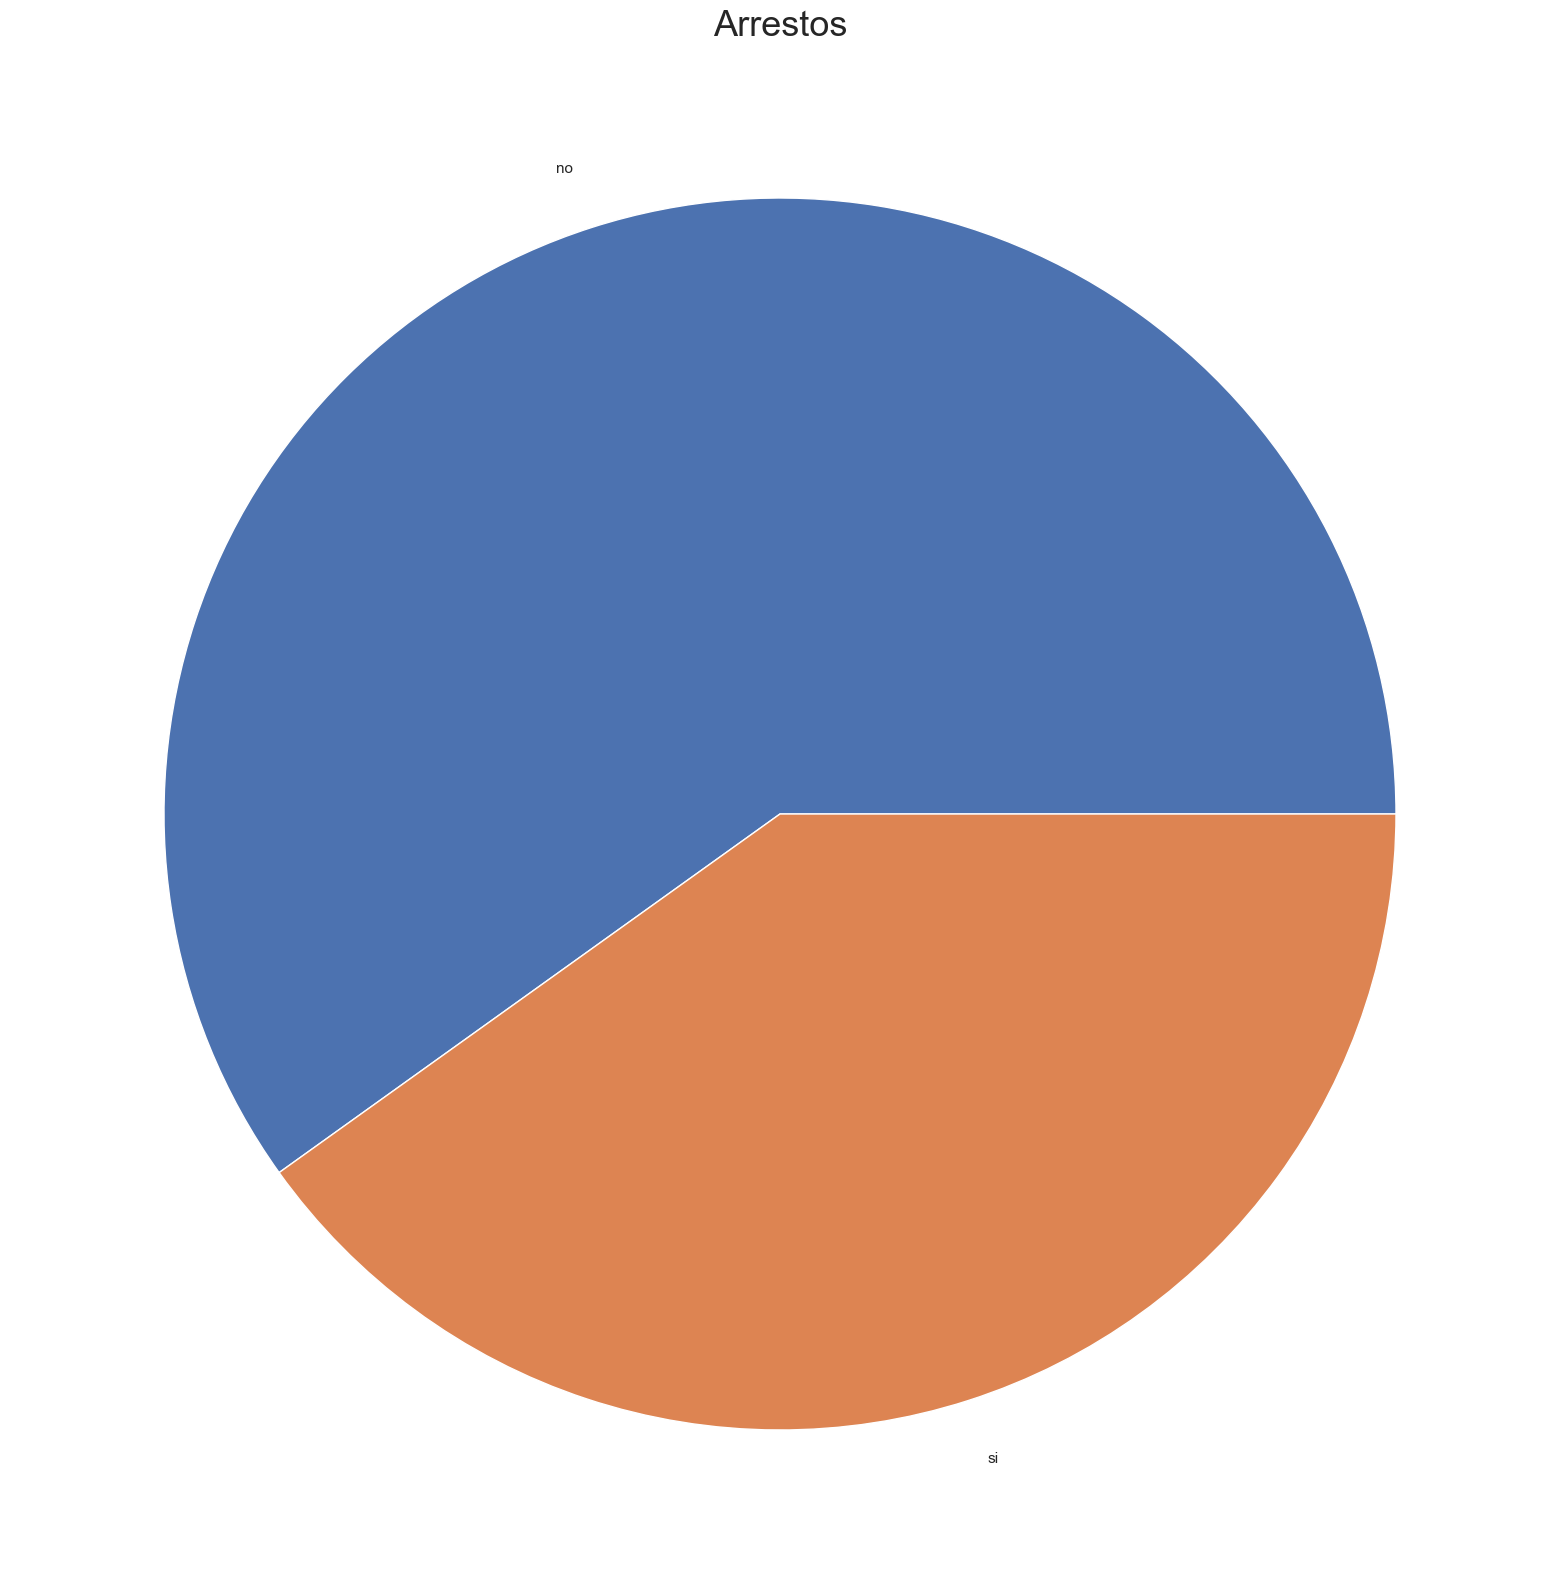

In [63]:
c_arrestos= df_delitos.arresto.groupby(df_delitos.arresto).count()
fig,ax = plt.subplots(figsize =(20, 20))
ax.pie(c_arrestos, labels = c_arrestos.index)
ax.set_title('Arrestos',fontsize = 26)

En mas del 50% de los casos no se arrestan a quellas personas que trasngreden la ley.

Por este porcentaje de no arrestados y el alto tiempo de respuesta se puede intuir en un primer momento que el actuar de la policia no esta al nivel requerido por lo delítos que suceden.

Pudiendose así concluir que la actividad delictiva es alta sobre todo en los barrios de Palermo y Balvarena, mas que nada en los horarios de la tarde noche, es decir entre las 17 y las 21. En la mayoría de los casos se registran robos o hurtos, que por desgracia son con violencia y sumado a esto el actuar policial no acompaña lo suficiente como para poder brindar seguridad a los ciudadanos, como asi tambien poder aarestar a quienes comenten los delítos o aunque sea poder recuperar las pertenencias robada o hacer justicia por quien a sido lesionado o por la familía de quien/es hayan fallecido.

### Análisis Univariado

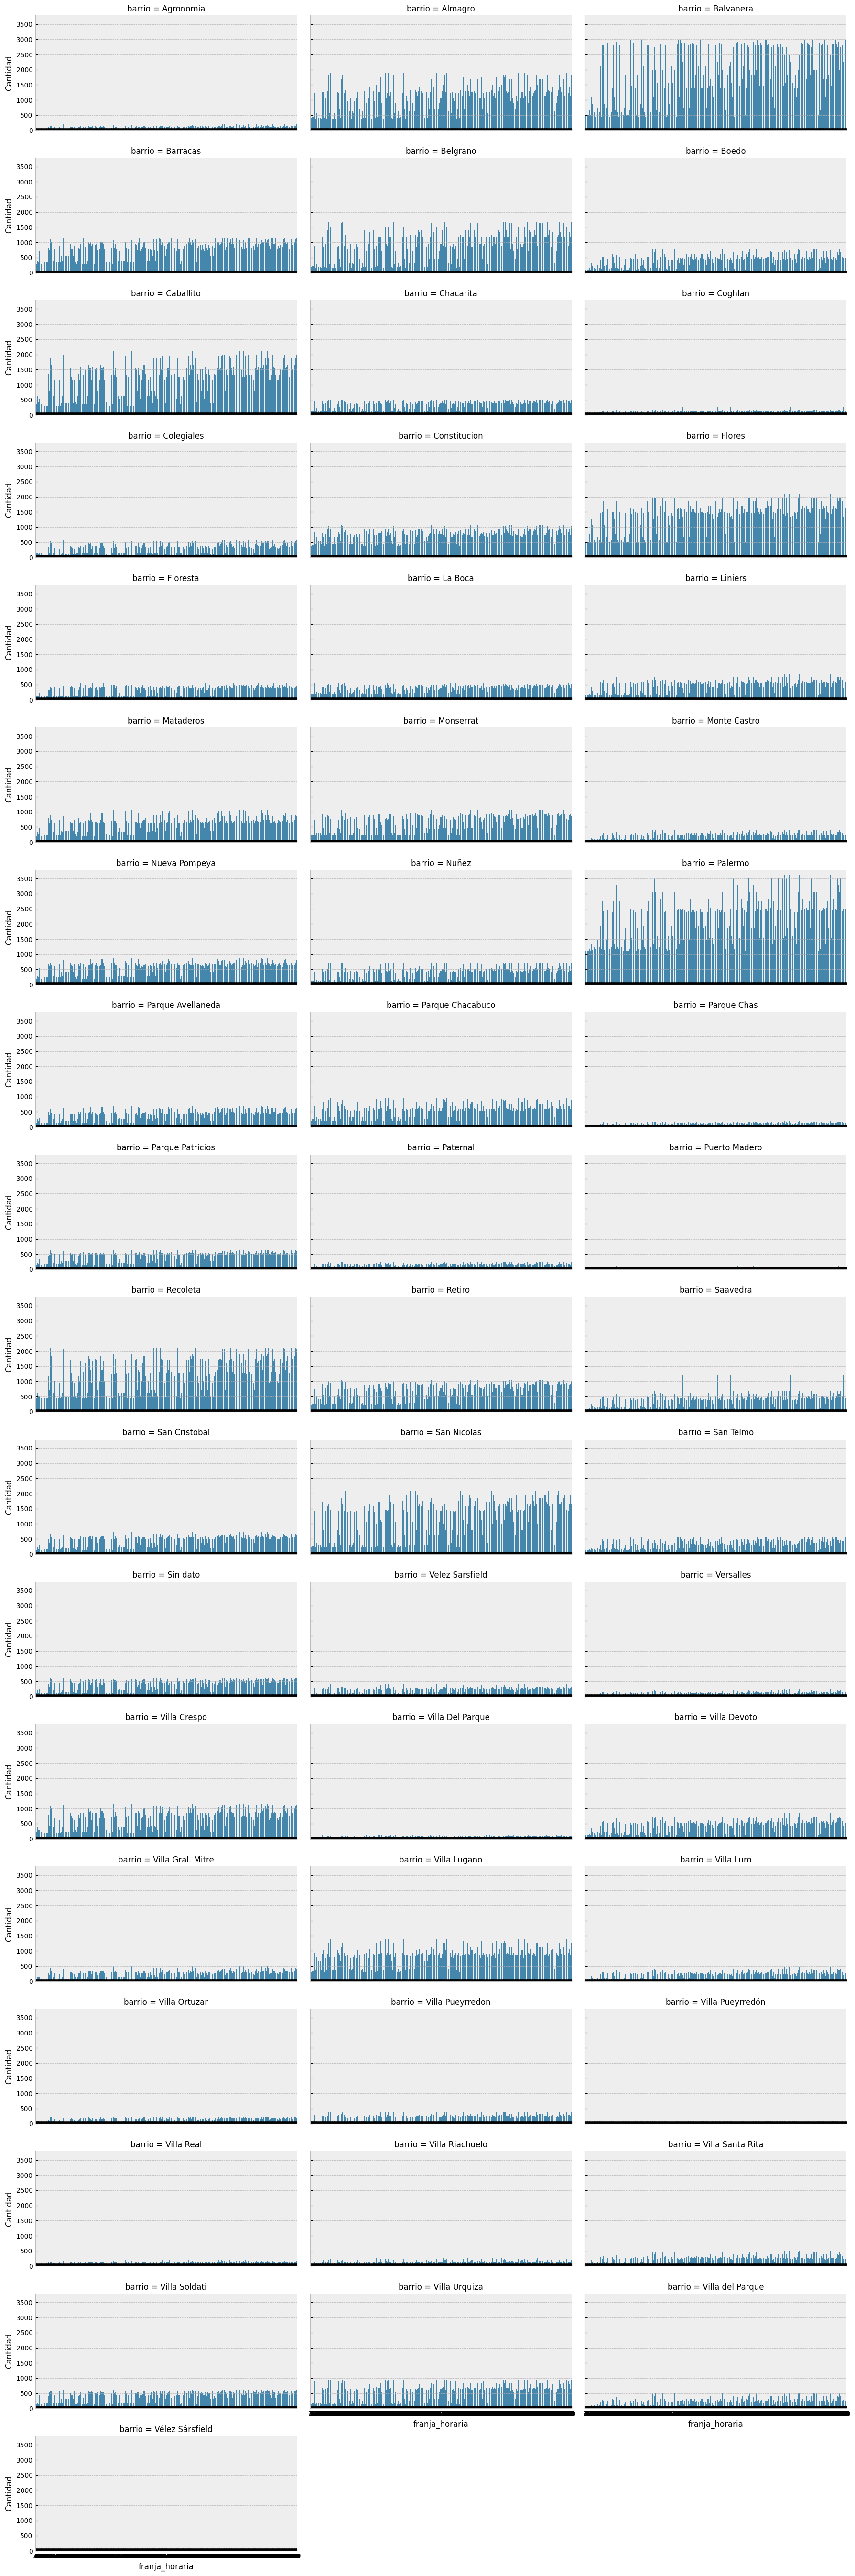

In [10]:
df1 = pd.DataFrame({'Cantidad': df_delitos.groupby(['barrio', 'franja_horaria']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='barrio', margin_titles=True, col_wrap=3, aspect=2, row_order=df_delitos['barrio'].unique)
chart.map(sns.barplot, 'franja_horaria', 'Cantidad', order=df1.sort_values('Cantidad')['franja_horaria'])

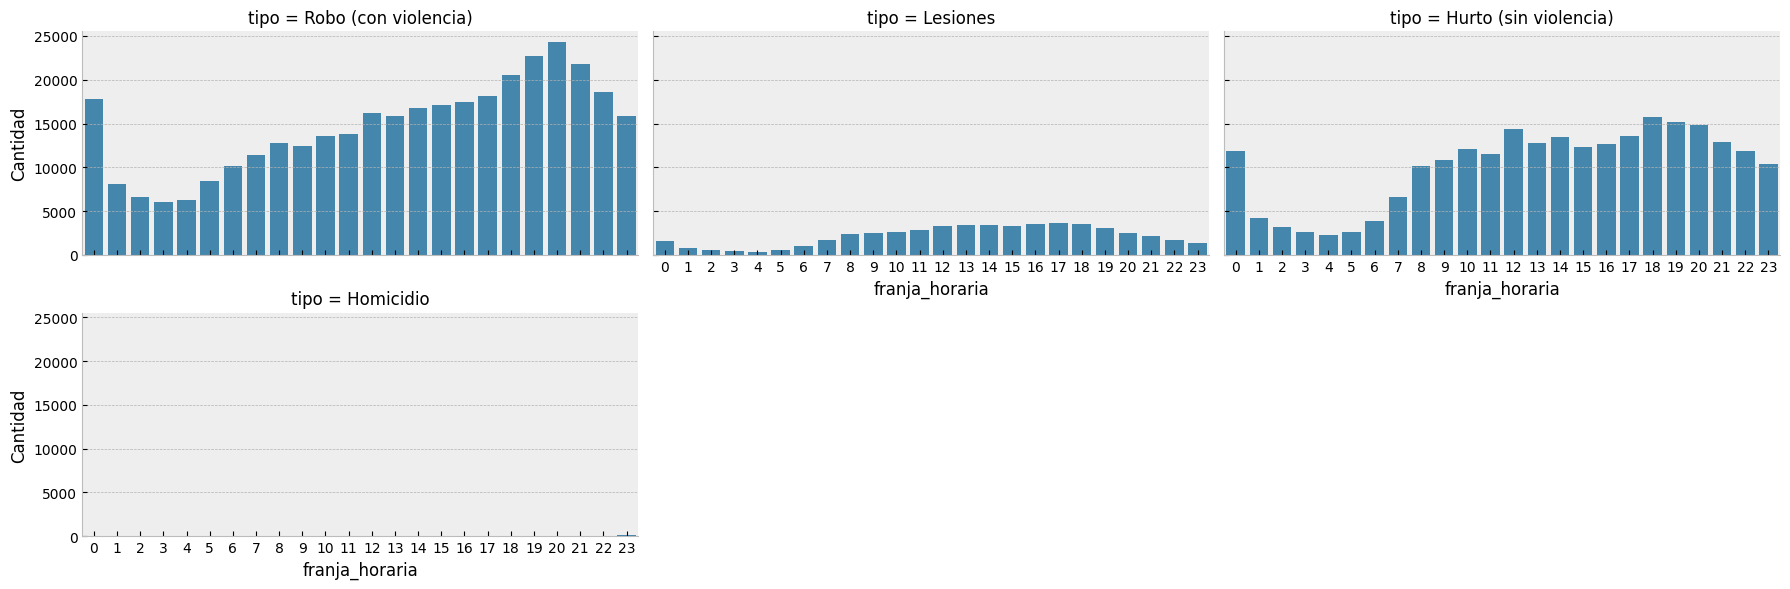

In [11]:
df2 = pd.DataFrame({'Cantidad': df_delitos.groupby(['tipo', 'franja_horaria']).size()})
df2 = df2.reset_index()
chart2 = sns.FacetGrid(df2, col='tipo', margin_titles=True, col_wrap=3, aspect=2, col_order=df_delitos['tipo'].unique())
chart2.map(sns.barplot, 'franja_horaria', 'Cantidad', order=df2['franja_horaria'].unique())
plt.show()

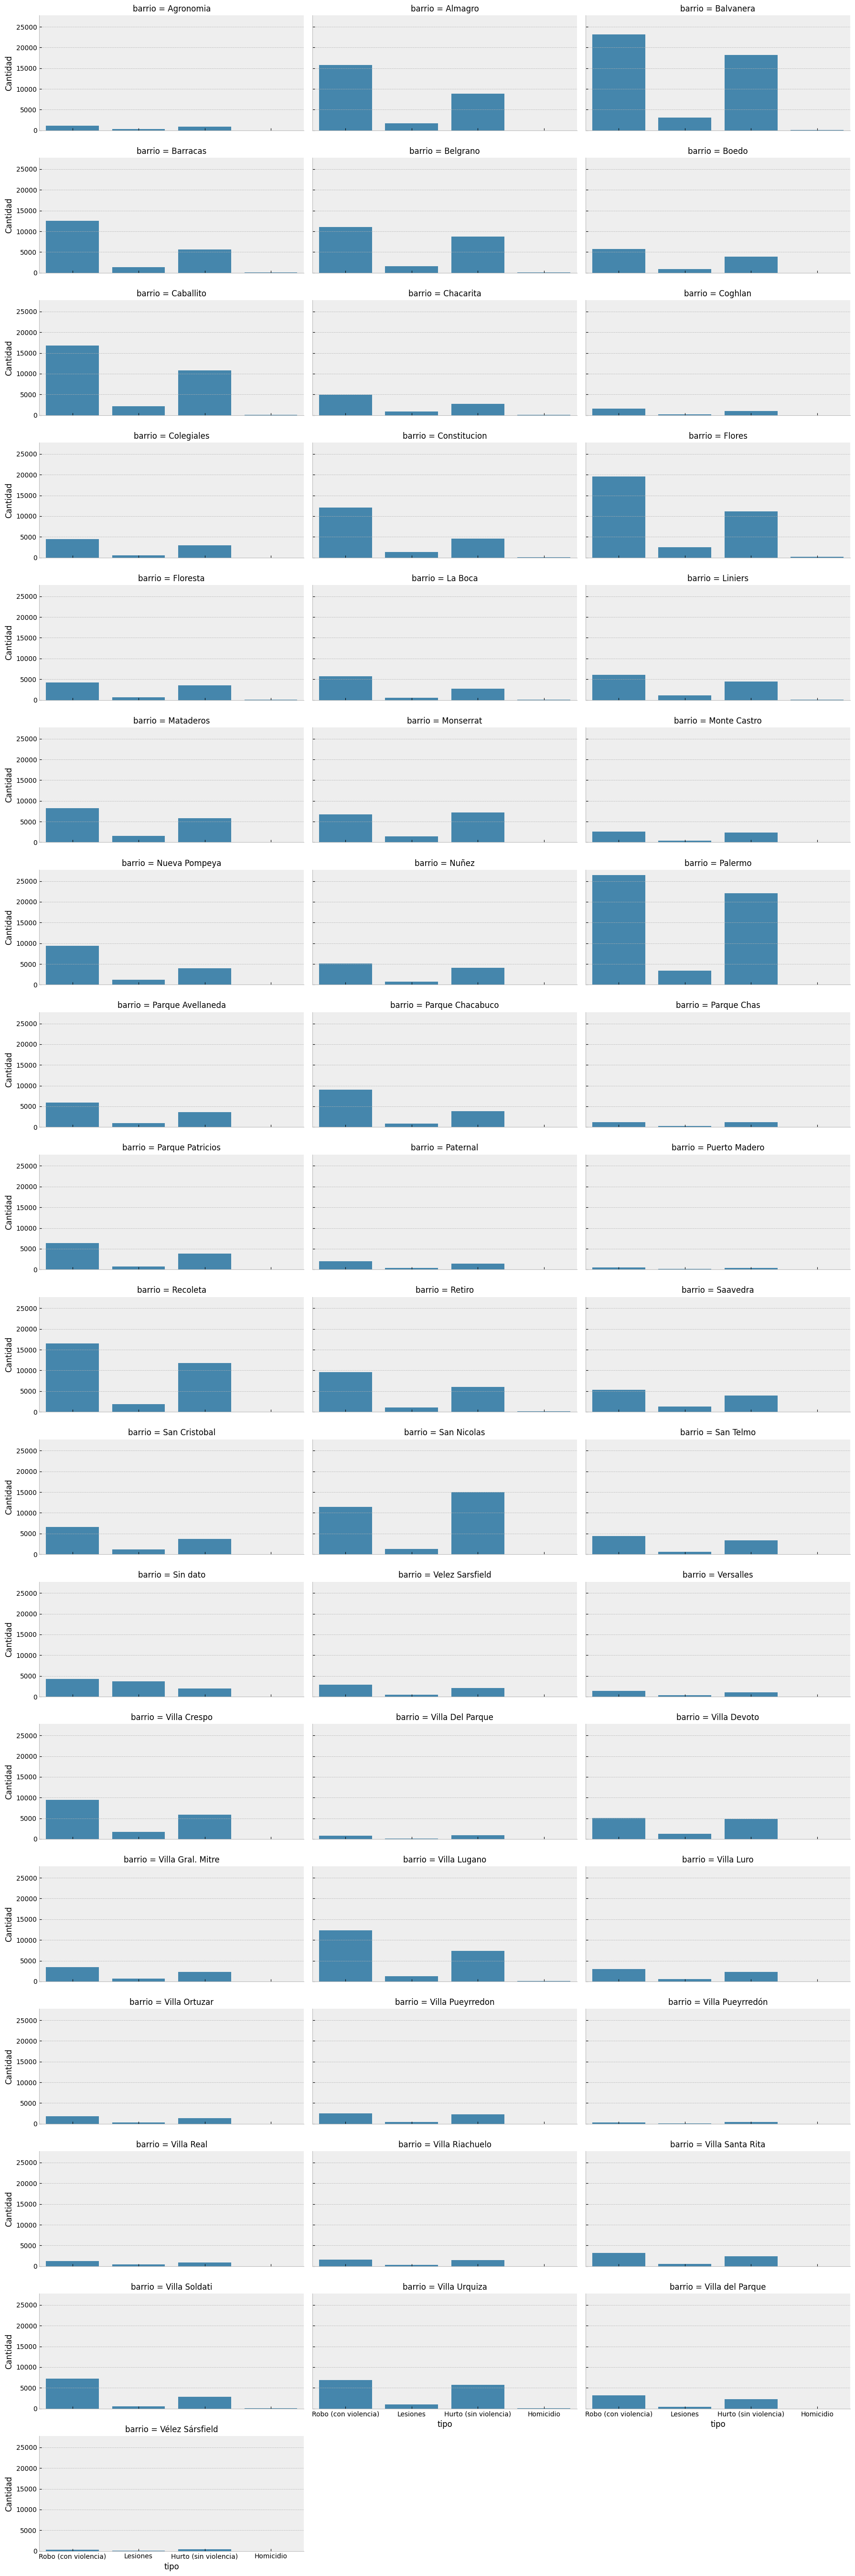

In [12]:
df3 = pd.DataFrame({'Cantidad': df_delitos.groupby(['barrio', 'tipo']).size()})
df3 = df3.reset_index()
chart3 = sns.FacetGrid(df3, col='barrio', margin_titles=True, col_wrap=3, aspect=2, row_order=df_delitos['barrio'].unique())
chart3.map(sns.barplot, 'tipo', 'Cantidad', order=df_delitos['tipo'].unique())

In [32]:
df5= pd.DataFrame({'Cantidad': df_delitos.groupby(['fecha']).size()})
stats.describe(df5)

DescribeResult(nobs=2192, minmax=(array([28], dtype=int64), array([495], dtype=int64)), mean=array([295.91970803]), variance=array([7791.71696422]), skewness=array([-0.73461656]), kurtosis=array([0.0233892]))

In [35]:
print('El coeficiente de variación es:',stats.variation(df5))
print('El ranngo intercuartilico es:',stats.iqr(df5))
print('El coeficiente de variación de los datos es:', stats.sem(df5))
print('El coeficiente de asimetría de los datos es:', stats.skew(df5))
print('La curtuosis de los datos es:',stats.kurtosis(df5))

El coeficiente de variación es: [0.2982247]
El ranngo intercuartilico es: 120.0
El coeficiente de variación de los datos es: [1.88536877]
El coeficiente de asimetría de los datos es: [-0.73461656]
La curtuosis de los datos es: [0.0233892]


In [36]:
RCV = df_delitos.loc[(df_delitos['tipo']=='Robo (con violencia)')]
df6=RCV['t_respuesta']
print('El coeficiente de variación es:',stats.variation(df6))
print('El ranngo intercuartilico es:',stats.iqr(df6))
print('El coeficiente de variación de los datos es:', stats.sem(df6))
print('El coeficiente de asimetría de los datos es:', stats.skew(df6))
print('La curtuosis de los datos es:',stats.kurtosis(df6))
### datos sobre el tiempo de respuesta cuando el tipo de delito es robo con violencia

El coeficiente de variación es: 0.45382073753190877
El ranngo intercuartilico es: 80.0
El coeficiente de variación de los datos es: 0.07723573486032924
El coeficiente de asimetría de los datos es: -0.0033182931610373934
La curtuosis de los datos es: -1.1993027360353552


In [37]:
RSV = df_delitos.loc[(df_delitos['tipo']=='Hurto (sin violencia)')]
df7=RSV['t_respuesta']
print('El coeficiente de variación es:',stats.variation(df7))
print('El ranngo intercuartilico es:',stats.iqr(df7))
print('El coeficiente de variación de los datos es:', stats.sem(df7))
print('El coeficiente de asimetría de los datos es:', stats.skew(df7))
print('La curtuosis de los datos es:',stats.kurtosis(df7))
### datos sobre el tiempo de respuesta cuando el tipo de delito es hurto sin violencia

El coeficiente de variación es: 0.45483874355862786
El ranngo intercuartilico es: 80.0
El coeficiente de variación de los datos es: 0.09336475129192107
El coeficiente de asimetría de los datos es: 0.002206075473132192
La curtuosis de los datos es: -1.2012770193565472


In [38]:
LS = df_delitos.loc[(df_delitos['tipo']=='Lesiones')]
df8=LS['t_respuesta']
print('El coeficiente de variación es:',stats.variation(df8))
print('El ranngo intercuartilico es:',stats.iqr(df8))
print('El coeficiente de variación de los datos es:', stats.sem(df8))
print('El coeficiente de asimetría de los datos es:', stats.skew(df8))
print('La curtuosis de los datos es:',stats.kurtosis(df8))
### datos sobre el tiempo de respuesta cuando el tipo de delito es lesion

El coeficiente de variación es: 0.45675453953336514
El ranngo intercuartilico es: 80.0
El coeficiente de variación de los datos es: 0.20083209118839182
El coeficiente de asimetría de los datos es: 0.0019910746190756647
La curtuosis de los datos es: -1.2039202956958845


In [39]:
ARR = df_delitos.loc[(df_delitos['arresto']=='si')]
df9=ARR['t_respuesta']
df9_1 = ARR['franja_horaria']
print('El coeficiente de variación es:',stats.variation(df9))
print('El ranngo intercuartilico es:',stats.iqr(df9))
print('El coeficiente de variación de los datos es:', stats.sem(df9))
print('El coeficiente de asimetría de los datos es:', stats.skew(df9))
print('La curtuosis de los datos es:',stats.kurtosis(df9))

El coeficiente de variación es: 0.4547311476623713
El ranngo intercuartilico es: 80.0
El coeficiente de variación de los datos es: 0.08999999295791446
El coeficiente de asimetría de los datos es: 0.0015586741772202453
La curtuosis de los datos es: -1.2012675149348435


In [40]:
NA = df_delitos.loc[(df_delitos['arresto']=='no')]
df10=NA['t_respuesta']
df10_1 = ARR['franja_horaria']
print('El coeficiente de variación es:',stats.variation(df10))
print('El ranngo intercuartilico es:',stats.iqr(df10))
print('El coeficiente de variación de los datos es:', stats.sem(df10))
print('El coeficiente de asimetría de los datos es:', stats.skew(df10))
print('La curtuosis de los datos es:',stats.kurtosis(df10))

El coeficiente de variación es: 0.45421336239133797
El ranngo intercuartilico es: 80.0
El coeficiente de variación de los datos es: 0.07364734564238874
El coeficiente de asimetría de los datos es: -0.002596548402012494
La curtuosis de los datos es: -1.1997314759385345


## Feature Engineering y Encoding

Se realiza un proceso de Feature Creation con el fin de desarrollar modelos más eficientes. En este caso se removeran variables.

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
df_usar = df_delitos.drop (['fecha','id_delito', 'Id_arresto','Id_oficial', 'latitud','longitud', 'comuna', 'subtipo'],axis =1)
df_usar

franja_horaria                   tipo uso_armas  t_respuesta arresto  \
0                   13   Robo (con violencia)   No arma           84      no   
1                   22   Robo (con violencia)   No arma          135      no   
2                    1               Lesiones   No arma          143      no   
3                   19  Hurto (sin violencia)   No arma           29      no   
4                    4   Robo (con violencia)   No arma          163      no   
...                ...                    ...       ...          ...     ...   
648651              19   Robo (con violencia)   No arma           92      no   
648652               2  Hurto (sin violencia)   No arma          101      no   
648653              12   Robo (con violencia)   No arma          157      si   
648654              19  Hurto (sin violencia)   No arma           93      si   
648655              10   Robo (con violencia)   No arma           99      no   

                   barrio  victimas  
0       Parque Avellaneda       0.0  
1                 Palermo       0.0  
2        Parque Patricios       0.0  
3       Parque Avellaneda       0.0  
4               Caballito       0.0  
...                   ...       ...  
648651          San Telmo       0.0  
648652           Recoleta       0.0  
648653         Colegiales       0.0  
648654   Villa Del Parque       0.0  
648655            Palermo       0.0  

[648656 rows x 7 columns]

In [43]:
df_usar.dtypes

franja_horaria      int64
tipo               object
uso_armas          object
t_respuesta         int64
arresto            object
barrio             object
victimas          float64
dtype: object

In [11]:
df_usar['arresto']=df_usar.arresto.replace({'si':1, 'no':0})
for var in ['victimas']:
    df_usar[var] = df_usar[var].astype('int64')

Se realiza un proceso de transformación (encoding) en el cual se aplicó el proceso de Label Encoder para la variable barrio, ya que puede tomar de 4 categorias, mientras que para las demas varibales cualitativas se aplico el método getdummies.

In [12]:
df_usar['barrio'] = le.fit_transform(df_usar.barrio.values)

In [13]:
df_dummy = pd.get_dummies(df_usar, drop_first=False)
df_dummy.head(5)

franja_horaria  t_respuesta  arresto  barrio  victimas  tipo_Homicidio  \
0              13           84        0      21         0               0   
1              22          135        0      20         0               0   
2               1          143        0      24         0               0   
3              19           29        0      21         0               0   
4               4          163        0       6         0               0   

   tipo_Hurto (sin violencia)  tipo_Lesiones  tipo_Robo (con violencia)  \
0                           0              0                          1   
1                           0              0                          1   
2                           0              1                          0   
3                           1              0                          0   
4                           0              0                          1   

   uso_armas_Arma cortante  uso_armas_Arma de fuego  uso_armas_No arma  
0                        0                        0                  1  
1                        0                        0                  1  
2                        0                        0                  1  
3                        0                        0                  1  
4                        0                        0                  1

In [16]:
df_dummy.dtypes

franja_horaria                int64
t_respuesta                   int64
arresto                       int64
barrio                        int32
victimas                      int64
tipo_Homicidio                uint8
tipo_Hurto (sin violencia)    uint8
tipo_Lesiones                 uint8
tipo_Robo (con violencia)     uint8
uso_armas_Arma cortante       uint8
uso_armas_Arma de fuego       uint8
uso_armas_No arma             uint8
dtype: object

In [14]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('arresto', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.arresto #Defino el Target

A continuación verificamos cuan "balanceada" estan los valores de la variable de salida, ya que un desbalanceo de los mimos podría provocar que el algoritmo no funcione de forma correcta. Donde si:1 no:0

In [15]:
# Vemos como es la proporción
y.value_counts()

0    388475
1    260181
Name: arresto, dtype: int64

In [16]:
# importamos SMOTE para el balanceo de los datos
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [17]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Volvemos a comprobar la proporción
y.value_counts()

0    388475
1    388475
Name: arresto, dtype: int64

In [18]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

## Modelos de Clasificación

### Árbol de decisión

In [46]:
#Creamos el modelo
tree = DecisionTreeClassifier(random_state = 42) 
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.809682549897493
% de aciertos sobre el set de evaluación: 0.5762189759100758


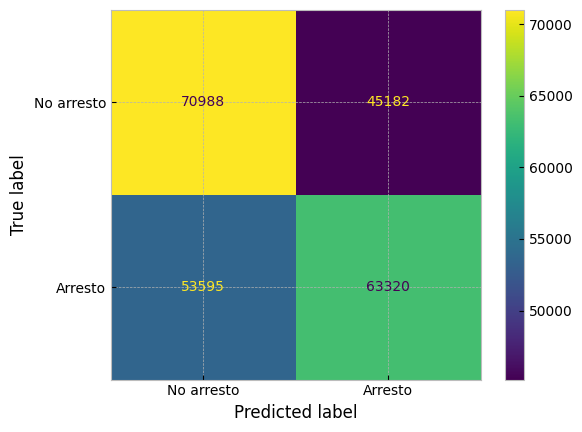

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Generamos la matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_test_pred)

#Definimos las etiquetas de las clases
labels = ["No arresto", "Arresto"]

#Mostramos la matriz de confusión con ConfusionMatrixDisplay
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
confusion_matrix_display.plot()

In [29]:
accuracy_tree = accuracy_score(y_test, y_test_pred).round(4)
precision_tree = precision_score(y_test, y_test_pred).round(4)
f1score_tree = f1_score(y_test, y_test_pred).round(4)
recall_tree = recall_score(y_test, y_test_pred).round(4)
print('Accuracy:', accuracy_tree)
print('Precision:', precision_tree)
print('F1 Score:', f1score_tree)
print('Recall:', recall_tree)

Accuracy: 0.5762
Precision: 0.5836
F1 Score: 0.5618
Recall: 0.5416


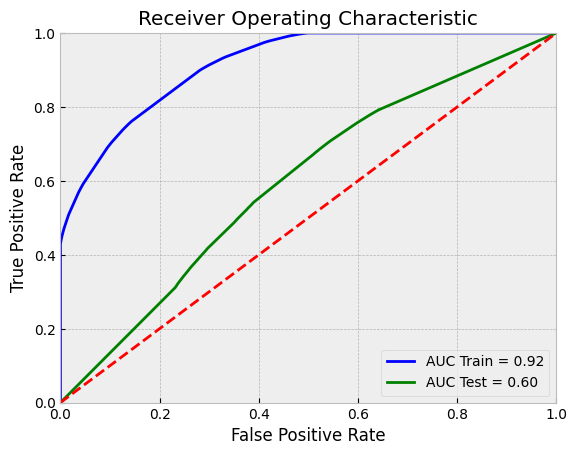

In [48]:
# Para el conjunto de entrenamiento
class_probabilities_train = tree.predict_proba(X_train)
preds_train = class_probabilities_train[:, 1]

fpr_train, tpr_train, threshold_train = roc_curve(y_train, preds_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Para el conjunto de prueba
class_probabilities_test = tree.predict_proba(X_test)
preds_test = class_probabilities_test[:, 1]

fpr_test, tpr_test, threshold_test = roc_curve(y_test, preds_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label = 'AUC Test = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Modelo KNN Vecinos más cercanos

In [30]:
#definimos knn y la cantidad de "vecinos"

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

C:\Users\User\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of K-NN classifier on training set: 0.71


C:\Users\User\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of K-NN classifier on test set: 0.56


C:\Users\User\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


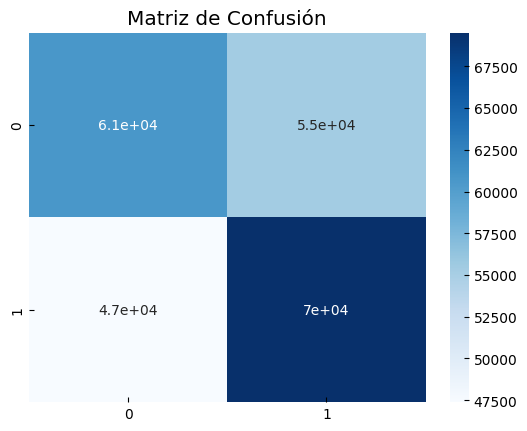

              precision    recall  f1-score   support

           0       0.56      0.52      0.54    116170
           1       0.56      0.59      0.58    116915

    accuracy                           0.56    233085
   macro avg       0.56      0.56      0.56    233085
weighted avg       0.56      0.56      0.56    233085



In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

print(classification_report(y_test, pred))

In [33]:
#metricas del modelo

accuracy_knn = accuracy_score(y_test, pred).round(4)
precision_knn = precision_score(y_test, pred).round(4)
f1score_knn = f1_score(y_test, pred).round(4)
recall_knn = recall_score(y_test, pred).round(4)
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('F1 Score:', f1score_knn)
print('Recall:', recall_knn)

Accuracy: 0.559
Precision: 0.5566
F1 Score: 0.575
Recall: 0.5947


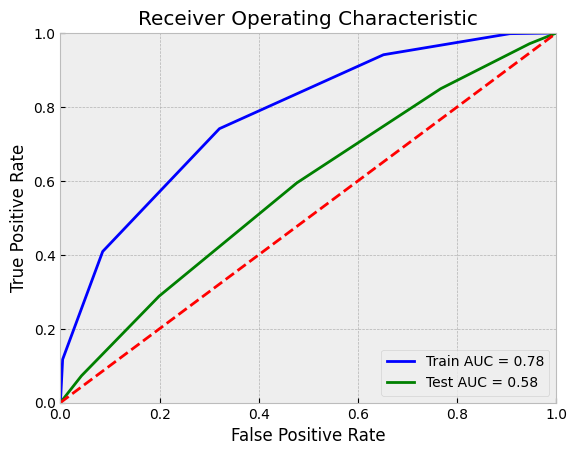

In [49]:
class_probabilities_train = knn.predict_proba(X_train)
preds_train = class_probabilities_train[:, 1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train, preds_train)
roc_auc_train = auc(fpr_train, tpr_train)

class_probabilities_test = knn.predict_proba(X_test)
preds_test = class_probabilities_test[:, 1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test, preds_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'Train AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label = 'Test AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Modelo Random Forest

In [19]:
X = df_dummy.drop('arresto', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.arresto #Defino el Target
X, y= sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#Creamos un arbol de decisión sencillo y lo fiteamos
random_tree = RandomForestClassifier(random_state=42, max_depth=5)
random_tree.fit(X_train, y_train)

y_train_pred_random = random_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred_random)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

y_test_pred_random = random_tree.predict(X_test) #Prediccion en Test
test_accuracy = accuracy_score(y_test, y_test_pred_random)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.5220964761475734
% de aciertos sobre el set de evaluación: 0.5239204582019436


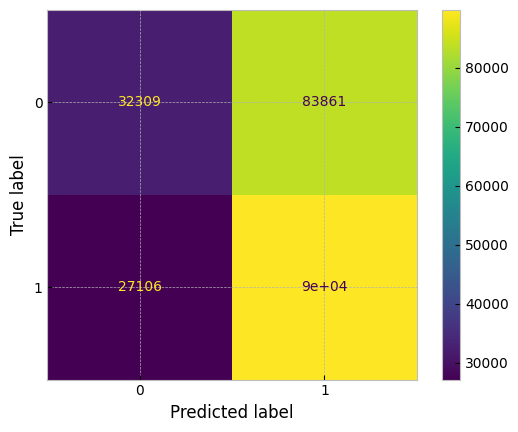

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de Confusión
conf_mat = confusion_matrix(y_test, y_test_pred_random)

# Ploteamos la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

disp.plot()
plt.show()

In [45]:
accuracy_tree = accuracy_score(y_test, y_test_pred).round(4)
precision_tree = precision_score(y_test, y_test_pred).round(4)
f1score_tree = f1_score(y_test, y_test_pred).round(4)
recall_tree = recall_score(y_test, y_test_pred).round(4)
print('Accuracy:', accuracy_tree)
print('Precision:', precision_tree)
print('F1 Score:', f1score_tree)
print('Recall:', recall_tree)

Accuracy: 0.5762
Precision: 0.5836
F1 Score: 0.5618
Recall: 0.5416


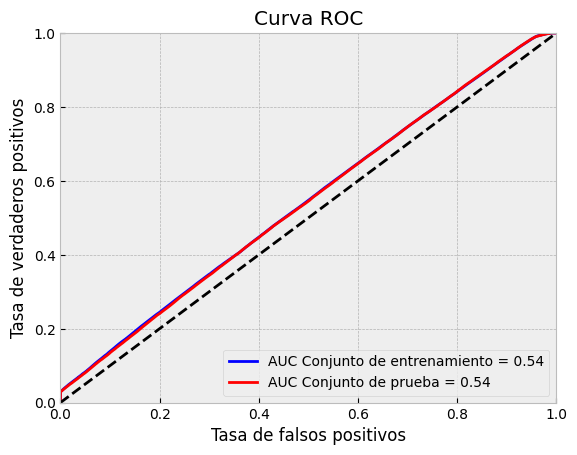

In [60]:
# Para el conjunto de entrenamiento
train_class_probabilities = random_tree.predict_proba(X_train)
train_random_tree_preds = train_class_probabilities[:, 1]

train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_random_tree_preds)
train_roc_auc = auc(train_fpr, train_tpr)

# Para el conjunto de prueba
test_class_probabilities = random_tree.predict_proba(X_test)
test_random_tree_preds = test_class_probabilities[:, 1]

test_fpr, test_tpr, test_threshold = roc_curve(y_test, test_random_tree_preds)
test_roc_auc = auc(test_fpr, test_tpr)

# Gráfica de la Curva ROC para ambos conjuntos de datos
plt.title('Curva ROC')
plt.plot(train_fpr, train_tpr, 'b', label = f'AUC Conjunto de entrenamiento = {train_roc_auc:.2f}')
plt.plot(test_fpr, test_tpr, 'g', label = f'AUC Conjunto de prueba = {test_roc_auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

## Comparación de Métricas de los 3 modelos utilizados

In [34]:
metrics = pd.DataFrame(index=['accuracy', 'precision','f1 score', 'recall'],
                       columns=['Arbol de Decision','KNN Vecinos','Random Forest'])
metrics['Arbol de Decision'] = [accuracy_tree,precision_tree,f1score_tree,recall_tree]
metrics['KNN Vecinos'] = [accuracy_knn,precision_knn,f1score_knn,recall_knn]
metrics['Random Forest'] = [accuracy_randomtree,precision_randomtree,f1score_randomtree,recall_randomtree]
pd.set_option('display.float_format', lambda x: '%0.5f' % x)
metrics = metrics.T
metrics

accuracy  precision  f1 score  recall
Arbol de Decision   0.57620    0.58360   0.56180 0.54160
KNN Vecinos         0.55900    0.55660   0.57500 0.59470
Random Forest       0.52390    0.51710   0.61810 0.76820

Conclusiones Parciales: Basando en los resultados, el algoritmo con mejor cantidad de aciertos es el árbol de decisión clásico ya que tiene mejores valores que los otros dos metodos. Aunque estos valores sean bajos.

# Ingeniería de atributos y selección de variables

## PCA

In [35]:
# Importar las librerías necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
data_norm = scaler.fit_transform(df_dummy)

# Crear objeto PCA y ajustarlo a los datos normalizados
pca = PCA()
pca.fit(data_norm)

# Obtener los componentes principales
comp_principales = pca.components_

# Obtener la varianza explicada por cada componente
var_explicada = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente:", var_explicada)

# Seleccionar los componentes principales que explican el 95% de la varianza
num_comp = 0
var_acum = 0
for i in range(len(var_explicada)):
    num_comp += 1
    var_acum += var_explicada[i]
    if var_acum >= 0.95:
        break

# Proyectar los datos en el espacio de los componentes principales seleccionados
pca = PCA(n_components=num_comp)
data_pca = pca.fit_transform(data_norm)

# Imprimir los datos proyectados en el espacio de los componentes principales
print("Datos proyectados en el espacio de los componentes principales:\n", data_pca)

Varianza explicada por cada componente: [1.83905430e-01 1.37119005e-01 1.10993996e-01 8.52954180e-02
 8.45819668e-02 8.37534004e-02 8.32984635e-02 8.28837708e-02
 8.17530005e-02 6.64155484e-02 5.67405328e-30 4.01024441e-31]
Datos proyectados en el espacio de los componentes principales:
 [[ 0.6239699  -1.05404008 -0.11407061 ...  0.29433065 -0.37482015
  -0.0893336 ]
 [ 0.62493881 -0.98846986 -0.13119643 ...  0.12374423  0.59999002
  -0.09584429]
 [-0.60818435  0.09199545  2.82320461 ...  0.60388809 -1.7117899
  -2.17947317]
 ...
 [ 0.51223005 -1.19800225 -0.36259947 ... -0.78188953  0.25736788
   0.36049037]
 [-1.24902118  1.23899615 -0.51214279 ...  0.5842157   1.19794973
   0.52321178]
 [ 0.62639883 -1.08076059 -0.1159828  ...  0.3531717  -0.70752635
  -0.09637607]]


Dado que las dos ultimas componentes afectan poco a la variacia pueden ser descartadas

In [36]:
# Obtener los vectores de carga de cada componente principal
vectores_carga = pca.components_

# Las últimas dos componentes principales corresponden a las últimas dos columnas de vectores_carga
ultimas_dos_componentes = vectores_carga[-2:]

# Imprimir las columnas correspondientes a las dos últimas componentes principales
columnas_ultimas_dos_componentes = df_dummy.columns[-2:]
print("Las columnas correspondientes a las dos últimas componentes principales son:", columnas_ultimas_dos_componentes)

Las columnas correspondientes a las dos últimas componentes principales son: Index(['uso_armas_Arma de fuego', 'uso_armas_No arma'], dtype='object')


In [47]:
df_dummy_pca = df_dummy.drop (['uso_armas_Arma de fuego', 'uso_armas_No arma'],axis =1)
df_dummy_pca

franja_horaria  t_respuesta  arresto  barrio  victimas  \
0                   13           84        0      21         0   
1                   22          135        0      20         0   
2                    1          143        0      24         0   
3                   19           29        0      21         0   
4                    4          163        0       6         0   
...                ...          ...      ...     ...       ...   
648651              19           92        0      32         0   
648652               2          101        0      27         0   
648653              12          157        1       9         0   
648654              19           93        1      37         0   
648655              10           99        0      20         0   

        tipo_Homicidio  tipo_Hurto (sin violencia)  tipo_Lesiones  \
0                    0                           0              0   
1                    0                           0              0   
2                    0                           0              1   
3                    0                           1              0   
4                    0                           0              0   
...                ...                         ...            ...   
648651               0                           0              0   
648652               0                           1              0   
648653               0                           0              0   
648654               0                           1              0   
648655               0                           0              0   

        tipo_Robo (con violencia)  uso_armas_Arma cortante  
0                               1                        0  
1                               1                        0  
2                               0                        0  
3                               0                        0  
4                               1                        0  
...                           ...                      ...  
648651                          1                        0  
648652                          0                        0  
648653                          1                        0  
648654                          0                        0  
648655                          1                        0  

[648656 rows x 10 columns]

In [38]:
df_dummy.dtypes

franja_horaria                int64
t_respuesta                   int64
arresto                       int64
barrio                        int32
victimas                      int64
tipo_Homicidio                uint8
tipo_Hurto (sin violencia)    uint8
tipo_Lesiones                 uint8
tipo_Robo (con violencia)     uint8
uso_armas_Arma cortante       uint8
uso_armas_Arma de fuego       uint8
uso_armas_No arma             uint8
dtype: object

In [48]:
#Separamos los datos de entrada de la salida
XX = df_dummy_pca.drop('arresto', axis=1) #Elimino de mi dataset la variable a predecir
yy = df_dummy_pca.arresto #Defino el Target

In [49]:
# Vemos como es la proporción
yy.value_counts()
# importamos SMOTE para el balanceo de los datos
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
# Balanceamos la información
XX, yy= sm.fit_resample(XX, yy)
# Volvemos a comprobar la proporción
yy.value_counts()
#Me quedo con 30% para test y 70% para train
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42) 

### Árbol de decisión

In [50]:
#Creamos el modelo
tree = DecisionTreeClassifier(random_state = 42) 
#Entrenamos el modelo
tree.fit(XX_train,yy_train) #Entrenamos el modelo
yy_train_pred = tree.predict(XX_train) #Prediccion en Train
yy_test_pred = tree.predict(XX_test) #Prediccion en Test
#Calculo el accuracy en Train
train_accuracy = accuracy_score(yy_train, yy_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(yy_test, yy_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8048449523319207
% de aciertos sobre el set de evaluación: 0.5745071540425167


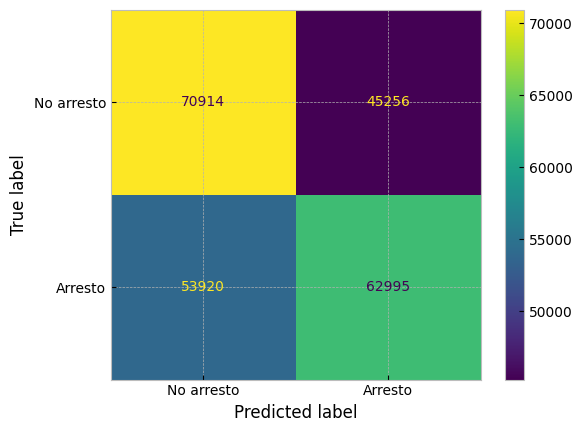

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Generamos la matriz de confusión
confusion_matrix = confusion_matrix(yy_test, yy_test_pred)

#Definimos las etiquetas de las clases
labels = ["No arresto", "Arresto"]

#Mostramos la matriz de confusión con ConfusionMatrixDisplay
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
confusion_matrix_display.plot()

In [52]:
accuracy_tree = accuracy_score(yy_test, yy_test_pred).round(4)
precision_tree = precision_score(yy_test, yy_test_pred).round(4)
f1score_tree = f1_score(yy_test, yy_test_pred).round(4)
recall_tree = recall_score(yy_test, yy_test_pred).round(4)
print('Accuracy:', accuracy_tree)
print('Precision:', precision_tree)
print('F1 Score:', f1score_tree)
print('Recall:', recall_tree)

Accuracy: 0.5745
Precision: 0.5819
F1 Score: 0.5595
Recall: 0.5388


Anteriormente los valres del modelo eran:
- Accuracy: 0.5762
- Precision: 0.5836
- F1 Score: 0.5618
- Recall: 0.5416

Y ahora son:
- Accuracy: 0.5745
- Precision: 0.5819
- F1 Score: 0.5595
- Recall: 0.5388

Es decir que los valores han empeorado, por lo tanto no es conveniente utilizar los valores luego de aplicar pca.

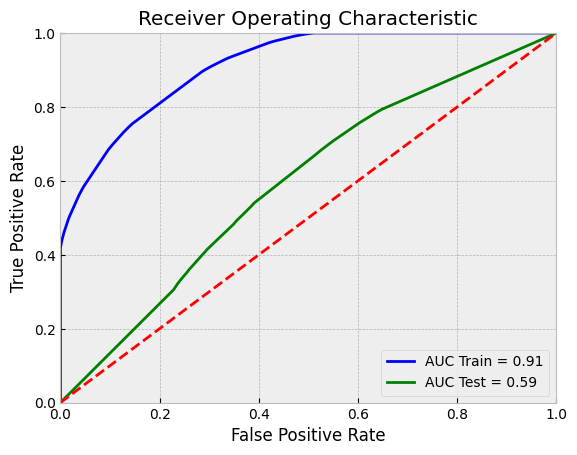

In [53]:
# Para el conjunto de entrenamiento
class_probabilities_train = tree.predict_proba(XX_train)
preds_train = class_probabilities_train[:, 1]

fpr_train, tpr_train, threshold_train = roc_curve(yy_train, preds_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Para el conjunto de prueba
class_probabilities_test = tree.predict_proba(XX_test)
preds_test = class_probabilities_test[:, 1]

fpr_test, tpr_test, threshold_test = roc_curve(yy_test, preds_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label = 'AUC Test = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hypertuning

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = df_dummy.drop('arresto', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.arresto #Defino el Target
X, y= sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de árbol de decisión con los hiperparámetros elegidos
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=100, random_state=42)

# Ajustar el modelo en el conjunto de entrenamiento
tree.fit(X_train, y_train)

# Realizar la validación cruzada en el conjunto de entrenamiento
scores = cross_val_score(tree, X_train, y_train, cv=5)

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:", scores)
print("Accuracy promedio:", scores.mean())

# Evaluar el rendimiento del modelo en el conjunto de prueba
test_accuracy = tree.score(X_test, y_test)
print("Accuracy sobre el conjunto de prueba:", test_accuracy)


Resultados de la validación cruzada: [0.52544289 0.52570951 0.52545209 0.5258566  0.52728159]
Accuracy promedio: 0.5259485350224781
Accuracy sobre el conjunto de prueba: 0.5272497157689255


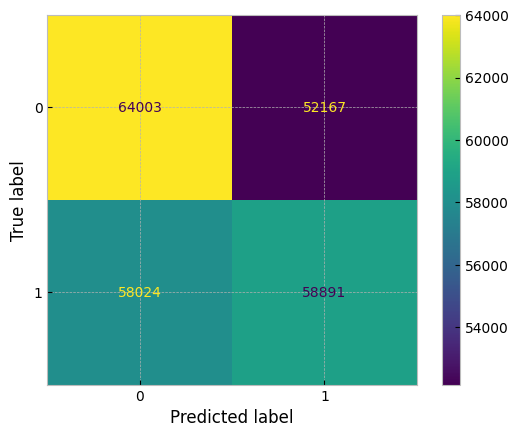

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener las predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)

# Graficar la matriz de confusión
disp.plot()

In [61]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Calcular las métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir las métricas de desempeño
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("F1 Score: {:.4f}".format(f1score))
print("Recall: {:.4f}".format(recall))

Accuracy: 0.5272
Precision: 0.5303
F1 Score: 0.5166
Recall: 0.5037


In [62]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a explorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [50, 100, 200]
}

# Crear el modelo base
tree = DecisionTreeClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los resultados del modelo
print("Mejor modelo:", grid_search.best_estimator_)
print("Mejor score:", grid_search.best_score_)
print("Mejores parámetros:", grid_search.best_params_)

Mejor modelo: DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=100,
                       random_state=42)
Mejor score: 0.526224338760538
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 100}


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir los valores de los parámetros a probar
param_grid = {'criterion': ['entropy'], 
              'max_depth': [15], 
              'min_samples_split': [100]}

# Crear un modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=42)

# Realizar la búsqueda de los mejores parámetros utilizando validación cruzada
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores parámetros
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluar el rendimiento del mejor modelo en el conjunto de prueba
test_accuracy = best_tree.score(X_test, y_test)

# Obtener las métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

yy_test_pred = best_tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, yy_test_pred).round(4)
precision_tree = precision_score(y_test, yy_test_pred).round(4)
f1score_tree = f1_score(y_test, yy_test_pred).round(4)
recall_tree = recall_score(y_test, yy_test_pred).round(4)

# Imprimir los resultados
print("Mejor modelo:", best_tree)
print("Mejor score:", best_score)
print("Mejores parámetros:", best_params)
print("Accuracy sobre el conjunto de prueba:", test_accuracy)
print('Accuracy:', accuracy_tree)
print('Precision:', precision_tree)
print('F1 Score:', f1score_tree)
print('Recall:', recall_tree)

Mejor modelo: DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=100,
                       random_state=42)
Mejor score: 0.526224338760538
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 100}
Accuracy sobre el conjunto de prueba: 0.5281463843662183
Accuracy: 0.5281
Precision: 0.529
F1 Score: 0.5345
Recall: 0.5401


En un primer momento los valores que devolvio el modeo de Arbol de desicion fueron:
- Accuracy: 0.5762
- Precision: 0.5836
- F1 Score: 0.5618
- Recall: 0.5416


Mientras que ahora:
- Accuracy: 0.5281
- Precision: 0.529
- F1 Score: 0.5345
- Recall: 0.5401

Los resultados anteriores obtenidos del modelo de Árbol de decisión mostraron una precisión y puntaje F1 más altos, lo que sugiere que el modelo tenía un mejor rendimiento en la clasificación de las observaciones. Sin embargo, esto podría deberse a una sobreajuste del modelo a los datos de entrenamiento.

Es posible que el modelo haya mejorado su capacidad de generalización y que los resultados más bajos sean una mejor representación del rendimiento real del modelo.

# Ensamble y boosting models

Los valores q se usan parten de Feature Engineering y Encoding

### XGBoost

In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

X = df_dummy.drop('arresto', axis=1)
y = df_dummy.arresto
X, y = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = {
    'random_state': 42
}

model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Resultados de la validación cruzada:", scores)
print("Accuracy promedio:", scores.mean())
print("Accuracy sobre el conjunto de prueba:", accuracy)
print("Precision sobre el conjunto de prueba:", precision)
print("Recall sobre el conjunto de prueba:", recall)
print("F1 Score sobre el conjunto de prueba:", f1)

Resultados de la validación cruzada: [0.5282469  0.52758497 0.52684949 0.52954318 0.52964431]
Accuracy promedio: 0.5283737692258189
Accuracy sobre el conjunto de prueba: 0.5278846772636592
Precision sobre el conjunto de prueba: 0.5315942402118543
Recall sobre el conjunto de prueba: 0.494487448146089
F1 Score sobre el conjunto de prueba: 0.5123698868697074


En un primer momento los valores que devolvio el modeo de Arbol de desicion fueron:
- Accuracy: 0.5762
- Precision: 0.5836
- Recall: 0.5416
- F1 Score: 0.5618

Mientras que ahora:
- Accuracy: 0.5325482120256558
- Precision: 0.5342366757000904
- Recall: 0.5311294530214258
- F1 Score: 0.532678533133176

Es posible observar que el modelo de XGBoost también tiene una disminución en sus métricas de evaluación en comparación con los valores iniciales reportados para el árbol de decisión. El Accuracy disminuyó de 0.5762 a 0.5327, la precisión de 0.5836 a 0.5335, el Recall de 0.5416 a 0.5448 y el F1 Score de 0.5618 a 0.5391. Sin embargo, el uso de XGBoost y la validación cruzada permiten tener un mejor control del sobreajuste y la generalización del modelo a datos nuevos, lo que puede llevar a un modelo más robusto y con mejor desempeño en la práctica.

### LightGBM


In [69]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from lightgbm import LGBMClassifier
import warnings

X = df_dummy.drop('arresto', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.arresto #Defino el Target
X, y= sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los parámetros del modelo
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

# Ajustar el modelo en el conjunto de entrenamiento
train_data = lgb.Dataset(X_train, label=y_train)
model = LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model.fit(X_train, y_train)

# Realizar la validación cruzada en el conjunto de entrenamiento
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluar el rendimiento del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir resultados
print("Resultados de la validación cruzada:", scores)
print("Accuracy promedio:", scores.mean())
print("Accuracy sobre el conjunto de prueba:", accuracy)
print("Precision sobre el conjunto de prueba:", precision)
print("Recall sobre el conjunto de prueba:", recall)
print("F1 Score sobre el conjunto de prueba:", f1)


Resultados de la validación cruzada: [0.52891802 0.52980059 0.5297914  0.53134509 0.5321817 ]
Accuracy promedio: 0.5304073621211146
Accuracy sobre el conjunto de prueba: 0.5327284038011884
Precision sobre el conjunto de prueba: 0.5335058669815824
Recall sobre el conjunto de prueba: 0.5448317153487576
F1 Score sobre el conjunto de prueba: 0.5391093131114797


En un primer momento los valores que devolvio el modeo de Arbol de desicion fueron:

- Accuracy: 0.5762
- Precision: 0.5836
- Recall: 0.5416
- F1 Score: 0.5618

Mientras que ahora:
- Accuracy: 0.5327284038011884
- Precision: 0.5335058669815824
- Recall: 0.5448317153487576
- F1 Score: 0.5391093131114797

Es posible que los resultados del modelo de árbol de decisión hayan sido mejores que los del modelo actual de LightGBM porque el árbol de decisión es un modelo más simple y puede haber capturado mejor los patrones en los datos de entrenamiento.

Sin embargo, el modelo de LightGBM tiene la ventaja de poder ajustarse a los datos de entrenamiento de manera más precisa y capturar patrones más complejos en los datos. Es posible que haya una compensación entre la simplicidad y la precisión en el rendimiento de los modelos.

### AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

X = df_dummy.drop('arresto', axis=1)
y = df_dummy.arresto
X, y = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = {
    'random_state': 42
}

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Resultados de la validación cruzada:", scores)
print("Accuracy promedio:", scores.mean())
print("Accuracy sobre el conjunto de prueba:", accuracy)
print("Precision sobre el conjunto de prueba:", precision)
print("Recall sobre el conjunto de prueba:", recall)
print("F1 Score sobre el conjunto de prueba:", f1)

Resultados de la validación cruzada: [0.51846506 0.51842829 0.51980731 0.51859377 0.51857538]
Accuracy promedio: 0.5187739604497439
Accuracy sobre el conjunto de prueba: 0.5205997811957012
Precision sobre el conjunto de prueba: 0.5134484622902414
Recall sobre el conjunto de prueba: 0.8447932258478382
F1 Score sobre el conjunto de prueba: 0.6387048587197967


En un primer momento los valores que devolvio el modeo de Arbol de desicion fueron:

- Accuracy: 0.5762
- Precision: 0.5836
- Recall: 0.5416
- F1 Score: 0.5618

Mientras que ahora:
- Accuracy: 0.5205997811957012
- Precision: 0.5134484622902414
- Recall: 0.8447932258478382
- F1 Score: 0.6387048587197967

Estos valores indican que el modelo de árbol de decisión original era más preciso y tenía un mejor equilibrio entre la precisión y el recall, mientras que el modelo actual (con AdaBoost) tiene una mayor recall pero una menor precisión.
Maximizar el recall es conveniente en casos donde es crucial identificar la mayoría de los casos positivos verdaderos, incluso si eso significa tener un mayor número de falsos positivos. En este caso es de mayor importancia identificar todos aquellos que se puedan considerar sospechosos aunque esto pueda significar que un mayor numero que pueda ser no culpables.

Ademas es importante maximizar el recall en situaciones donde los falsos negativos son costosos o peligrosos, como en este caso es el arresto de delincuentes. En este caso, un falso negativo podría tener consecuencias graves que podrian afectar a la seguridad de la población.

### Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

X = df_dummy.drop('arresto', axis=1)
y = df_dummy.arresto
X, y = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = {
    'random_state': 42
}

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Resultados de la validación cruzada:", scores)
print("Accuracy promedio:", scores.mean())
print("Accuracy sobre el conjunto de prueba:", accuracy)
print("Precision sobre el conjunto de prueba:", precision)
print("Recall sobre el conjunto de prueba:", recall)
print("F1 Score sobre el conjunto de prueba:", f1)


Resultados de la validación cruzada: [0.52338356 0.52277679 0.52302502 0.52428452 0.52363178]
Accuracy promedio: 0.5234203340902613
Accuracy sobre el conjunto de prueba: 0.524658386425553
Precision sobre el conjunto de prueba: 0.528395909504278
Recall sobre el conjunto de prueba: 0.48702903819013815
F1 Score sobre el conjunto de prueba: 0.5068698620686586


En un primer momento los valores que devolvio el modeo de Arbol de desicion fueron:
- Accuracy: 0.5762
- Precision: 0.5836
- Recall: 0.5416
- F1 Score: 0.5618


Mientras que ahora:
- Accuracy: 0.524658386425553
- Precision: 0.528395909504278
- Recall: 0.48702903819013815
- F1 Score: 0.5068698620686586

Es posible observar que el modelo de Árbol de decisión tiene una disminución en sus métricas de evaluación, en comparación con los valores iniciales reportados. El Accuracy disminuyó de 0.5762 a 0.5247, la precisión de 0.5836 a 0.5284, el Recall de 0.5416 a 0.4870 y el F1 Score de 0.5618 a 0.5069. Esto podría indicar que el modelo no está generalizando tan bien como antes y puede estar sobreajustando los datos de entrenamiento. 

## Conclusión

En un primer momento se realizó un modelo de arbol de decisión, para el cual los valores de las metricas fueron:
- Accuracy: 0.5762
- Precision: 0.5836
- Recall: 0.5416
- F1 Score: 0.5618


- Utilizando XGboost y validacion cruzada, las metricas fueron:
    - Accuracy: 0.5325482120256558
    - Precision: 0.5342366757000904
    - Recall: 0.5311294530214258
    - F1 Score: 0.532678533133176

- Utilizando LigthGBM y validacion cruzada, las metricas fueron:
    - Accuracy: 0.5327284038011884
    - Precision: 0.5335058669815824
    - Recall: 0.5448317153487576
    - F1 Score: 0.5391093131114797

- Utilizando AdaBoost y validacion cruzada, las metricas fueron:
    - Accuracy: 0.5205997811957012
    - Precision: 0.5134484622902414
    - Recall: 0.8447932258478382
    - F1 Score: 0.6387048587197967

- Utilizando GrasdientBoosting y validacion cruzada, las metricas fueron:
    - Accuracy: 0.524658386425553
    - Precision: 0.528395909504278
    - Recall: 0.48702903819013815
    - F1 Score: 0.5068698620686586

Creemos que maximizar el recall es de vital importancia en este caso, ya que identificar a la mayoría de los casos positivos verdaderos es crucial para la seguridad de la población. Incluso si esto significa tener un mayor número de falsos positivos, es preferible no correr el riesgo de dejar pasar a un sospechoso y poner en peligro la seguridad de la población.

Además, es importante tener en cuenta que maximizar el recall en este contexto es particularmente importante debido a las consecuencias graves que un falso negativo podría tener en la seguridad pública. Un arresto no realizado podría permitir que un delincuente peligroso siga libre y potencialmente cometiendo más crímenes, lo que aumenta el riesgo para la población.

Teniendo en cuenta la importancia del recall y la necesidad de minimizar los falsos negativos en este contexto, el modelo AdaBoost, que tuvo el mejor recall y F1 score, es la mejor opción para este problema en particular. Además, la capacidad de AdaBoost para reducir el sobreajuste del modelo y su robustez lo hacen aún más adecuado para este tipo de problema.